<h1><center>
    ECE 438: Digital Signal Processing with Applications<br/>
    Lab 3: Frequency Analysis<br/>
    <small>Date: 9/19/2024</small><br/>
    <small>Section: Thursday 11:30</small><br>
</center></h1>

|Name |Signature |Time spent outside lab|
|:---:|:---:|:---:|
|John Parrell #1 [---%]| JSP | |
|Student Name #2 [---%]| | |

||Below expectations| Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|**Completeness of the report**||||
|**Organization of the report**||||
|**Quality of figures**: *Correctly labeled with title, x-axis, y-axis, and name(s)*||||
|**Ability to compute Fourier series expansion and synthesize periodic signals using the expansion in Simulink (26 pts)**: *Derivation and sketch, plots of synthesized signals, questions*||||
|**Understanding of modulator and CT system analysis (26 pts)**: *Output plots, questions*||||
|**Implementation of DTFT (21 pts)**: *Python function, DTFT’s magnitude and phase plots*||||
|**DT system analysis (27 pts)**: *Exercises in 5.2, completed block diagram, table of measurements, impulse and frequency response*||||

In [61]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h3 style="color:red;"><left>Exercise 2.1</left></h3>

**1. For each of these two signals, do the following on a blank sheet of paper (or type the equations in the Markdown cell if you are familiar with LaTex):**
* **Compute the Fourier series expansion in the form**
\begin{equation}
    s(t)=a_0+\sum_{k=1}^\infty A_k\sin(2\pi kf_0t+\theta_k)
\end{equation}
where $f_0=\frac{1}{T_0}$.

    **Hint :**You may want to use one of the following references:

    Sec. 4.1 of “Digital Signal Processing”, by Proakis and Manolakis, 1996;

    Sec. 4.2 of “Signals and Systems”, by A. Oppenheim and A. Willsky, 1983;

    Sec. 3.3 of “Signals and Systems”, A. Oppenheim and A. Willsky, 1997.

    Note that in the expression above, the function in the summation is $\sin(2\pi kf_0 t + \theta k )$, rather than a complex sinusoid. The formulas in the above references must be modified to accommodate this. You can compute the cos/sin version of the Fourier series, then convert the coefficients.

write your answer here

**2. Write code to approximate the two signals using the Fourier series expansion above. Use 200 (instead of infinite number of) Sine waves. Then, plot these two signals.**

In [63]:
# write your code here


<h3 style="color:red;"><left>Exercise 4.1</left></h3>

**1. Hand in plots of the Spectrum Analyzer output for each of the three synthesized waveforms.** 

Original plot (first waveform):
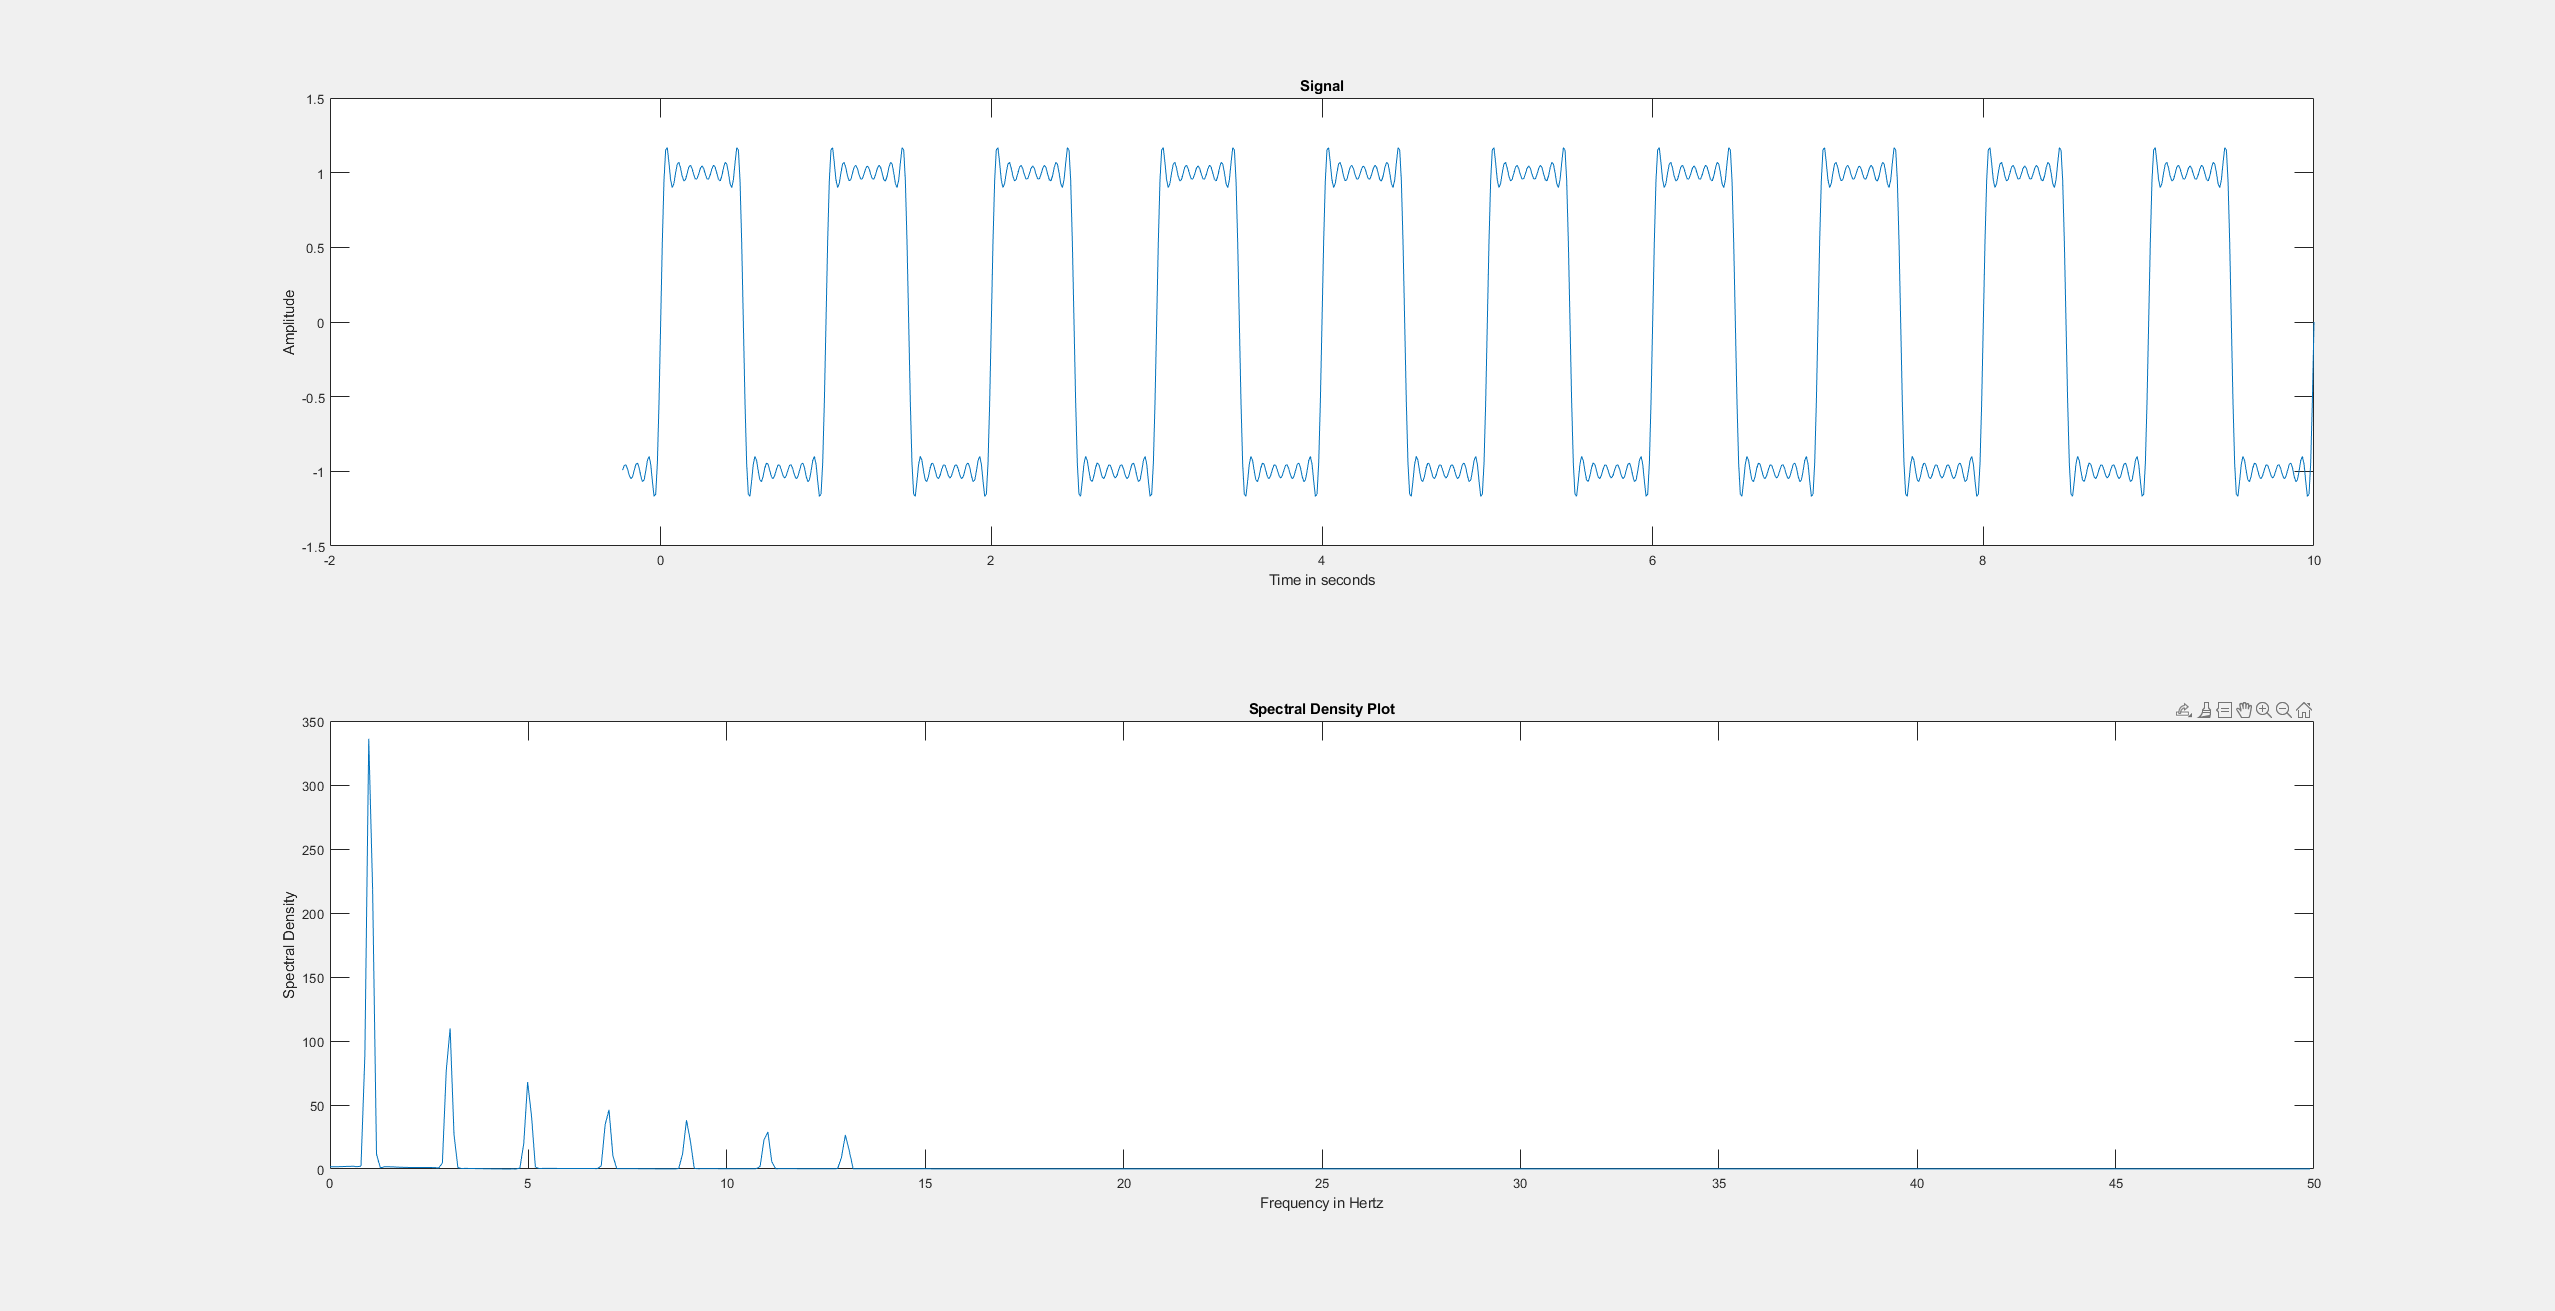

Second waveform rect(t - 1/2):
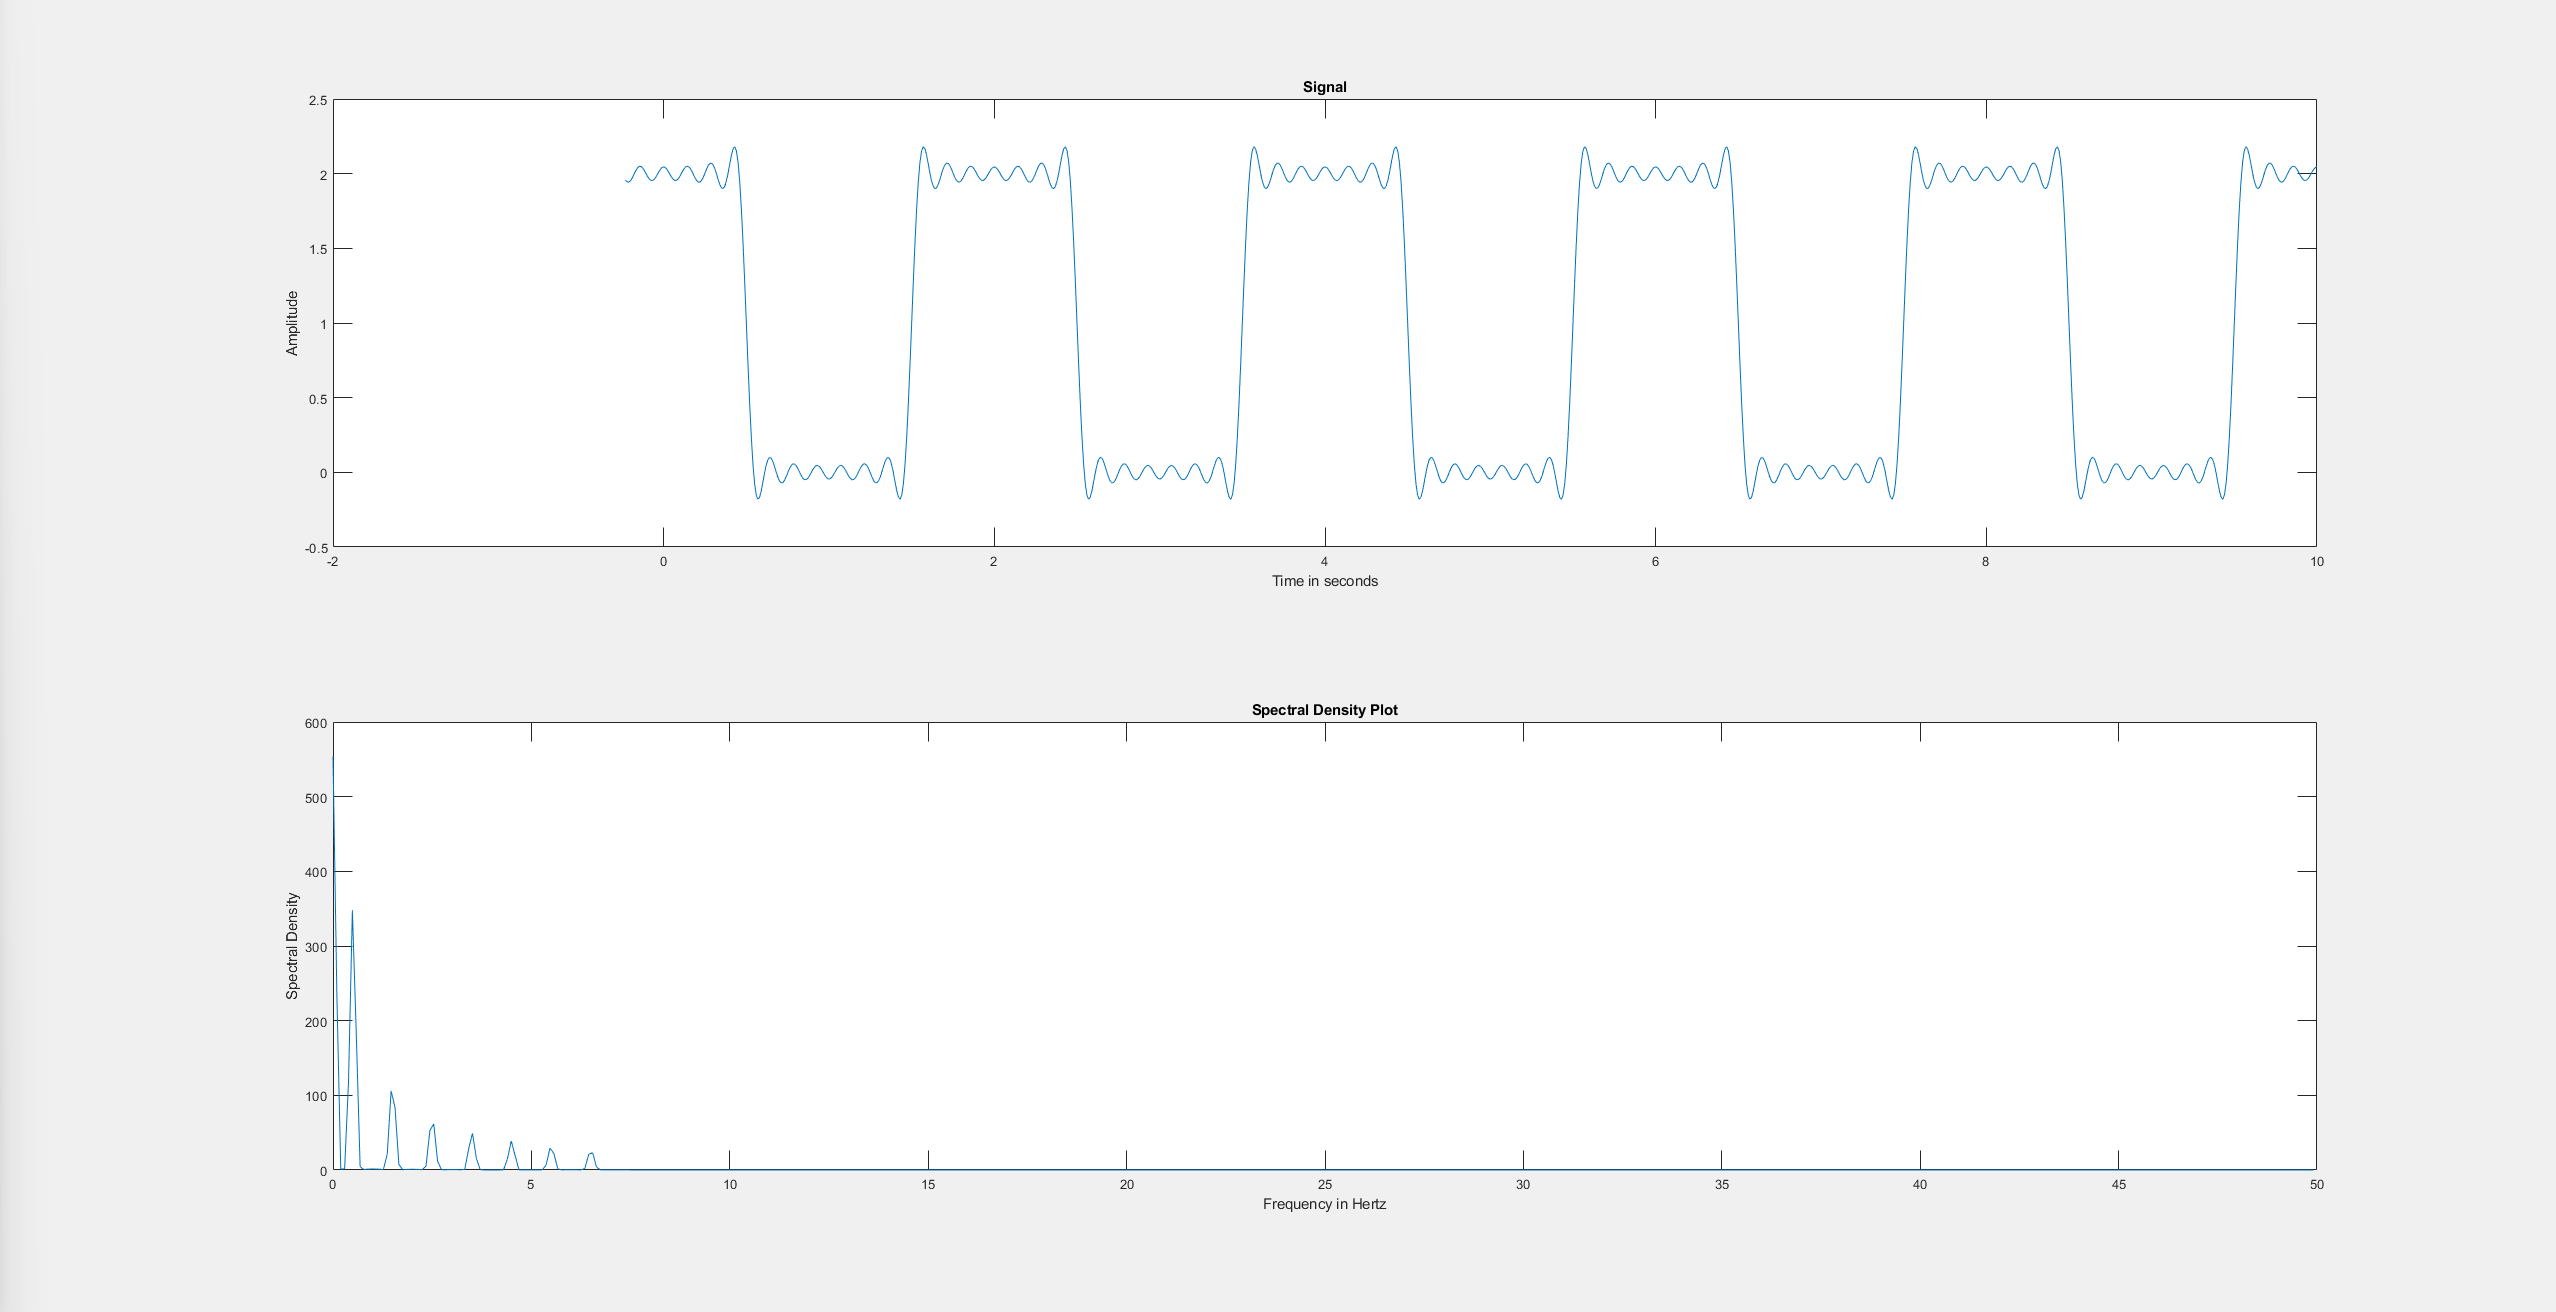

Third waveform rect(2t - 1/2):
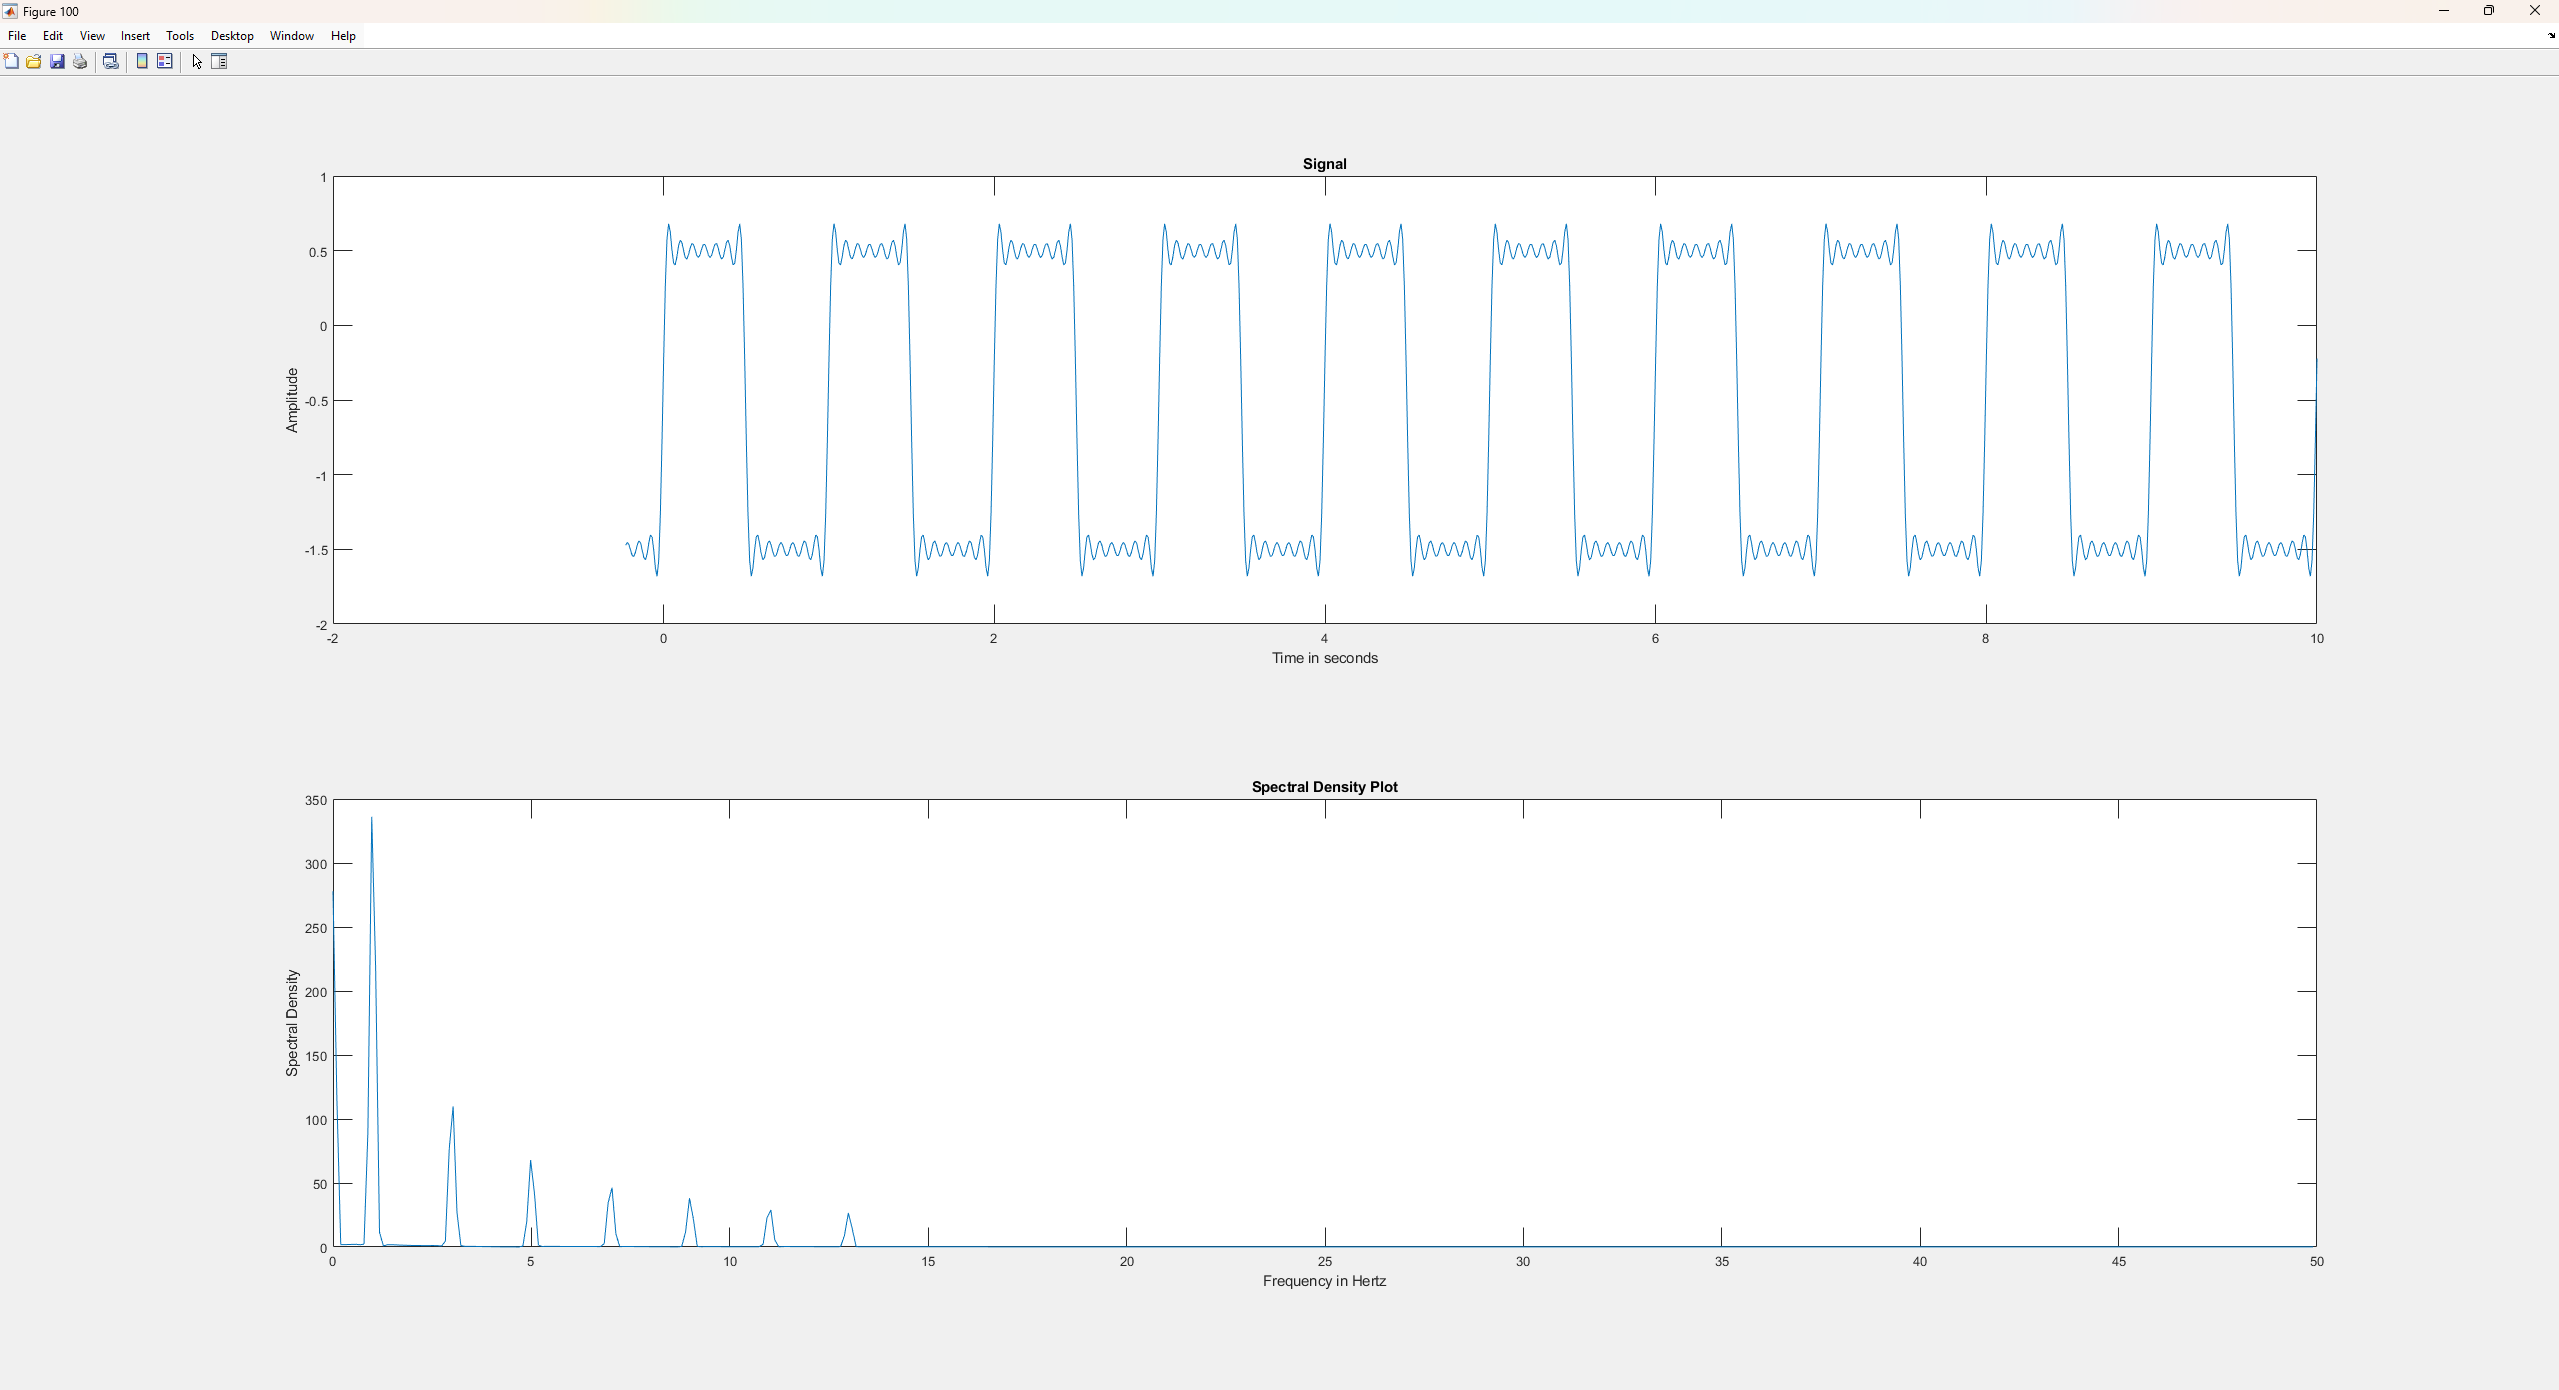


**2. For each case in Q1, comment on how the synthesized waveform differs from the desired signal,and on the structure of the spectral density.**

The synthesized waveform differs in all of the cases from the desired signal to it being approximated by sinusoids added together. If you were to want to use these signals, you would need to verify that the time needed to create a rising/falling edge from the addition of these sinusoids was low enough for whatever purpose you had. You'd also have to account for the "noise" at the high and low points. for waveforms 1 and 3, which are of the same frequency, the spectral density peaks at the frequency of each different sinusoid. This is the same for signal 2, except the frequency of each peak is halved since the period of the signal is halved. 

<h3 style="color:red;"><left>Exercise 4.2</left></h3>

**1. Hand in plots of the output of the *Spectrum Analyzer* for each signal.**

Original signal:
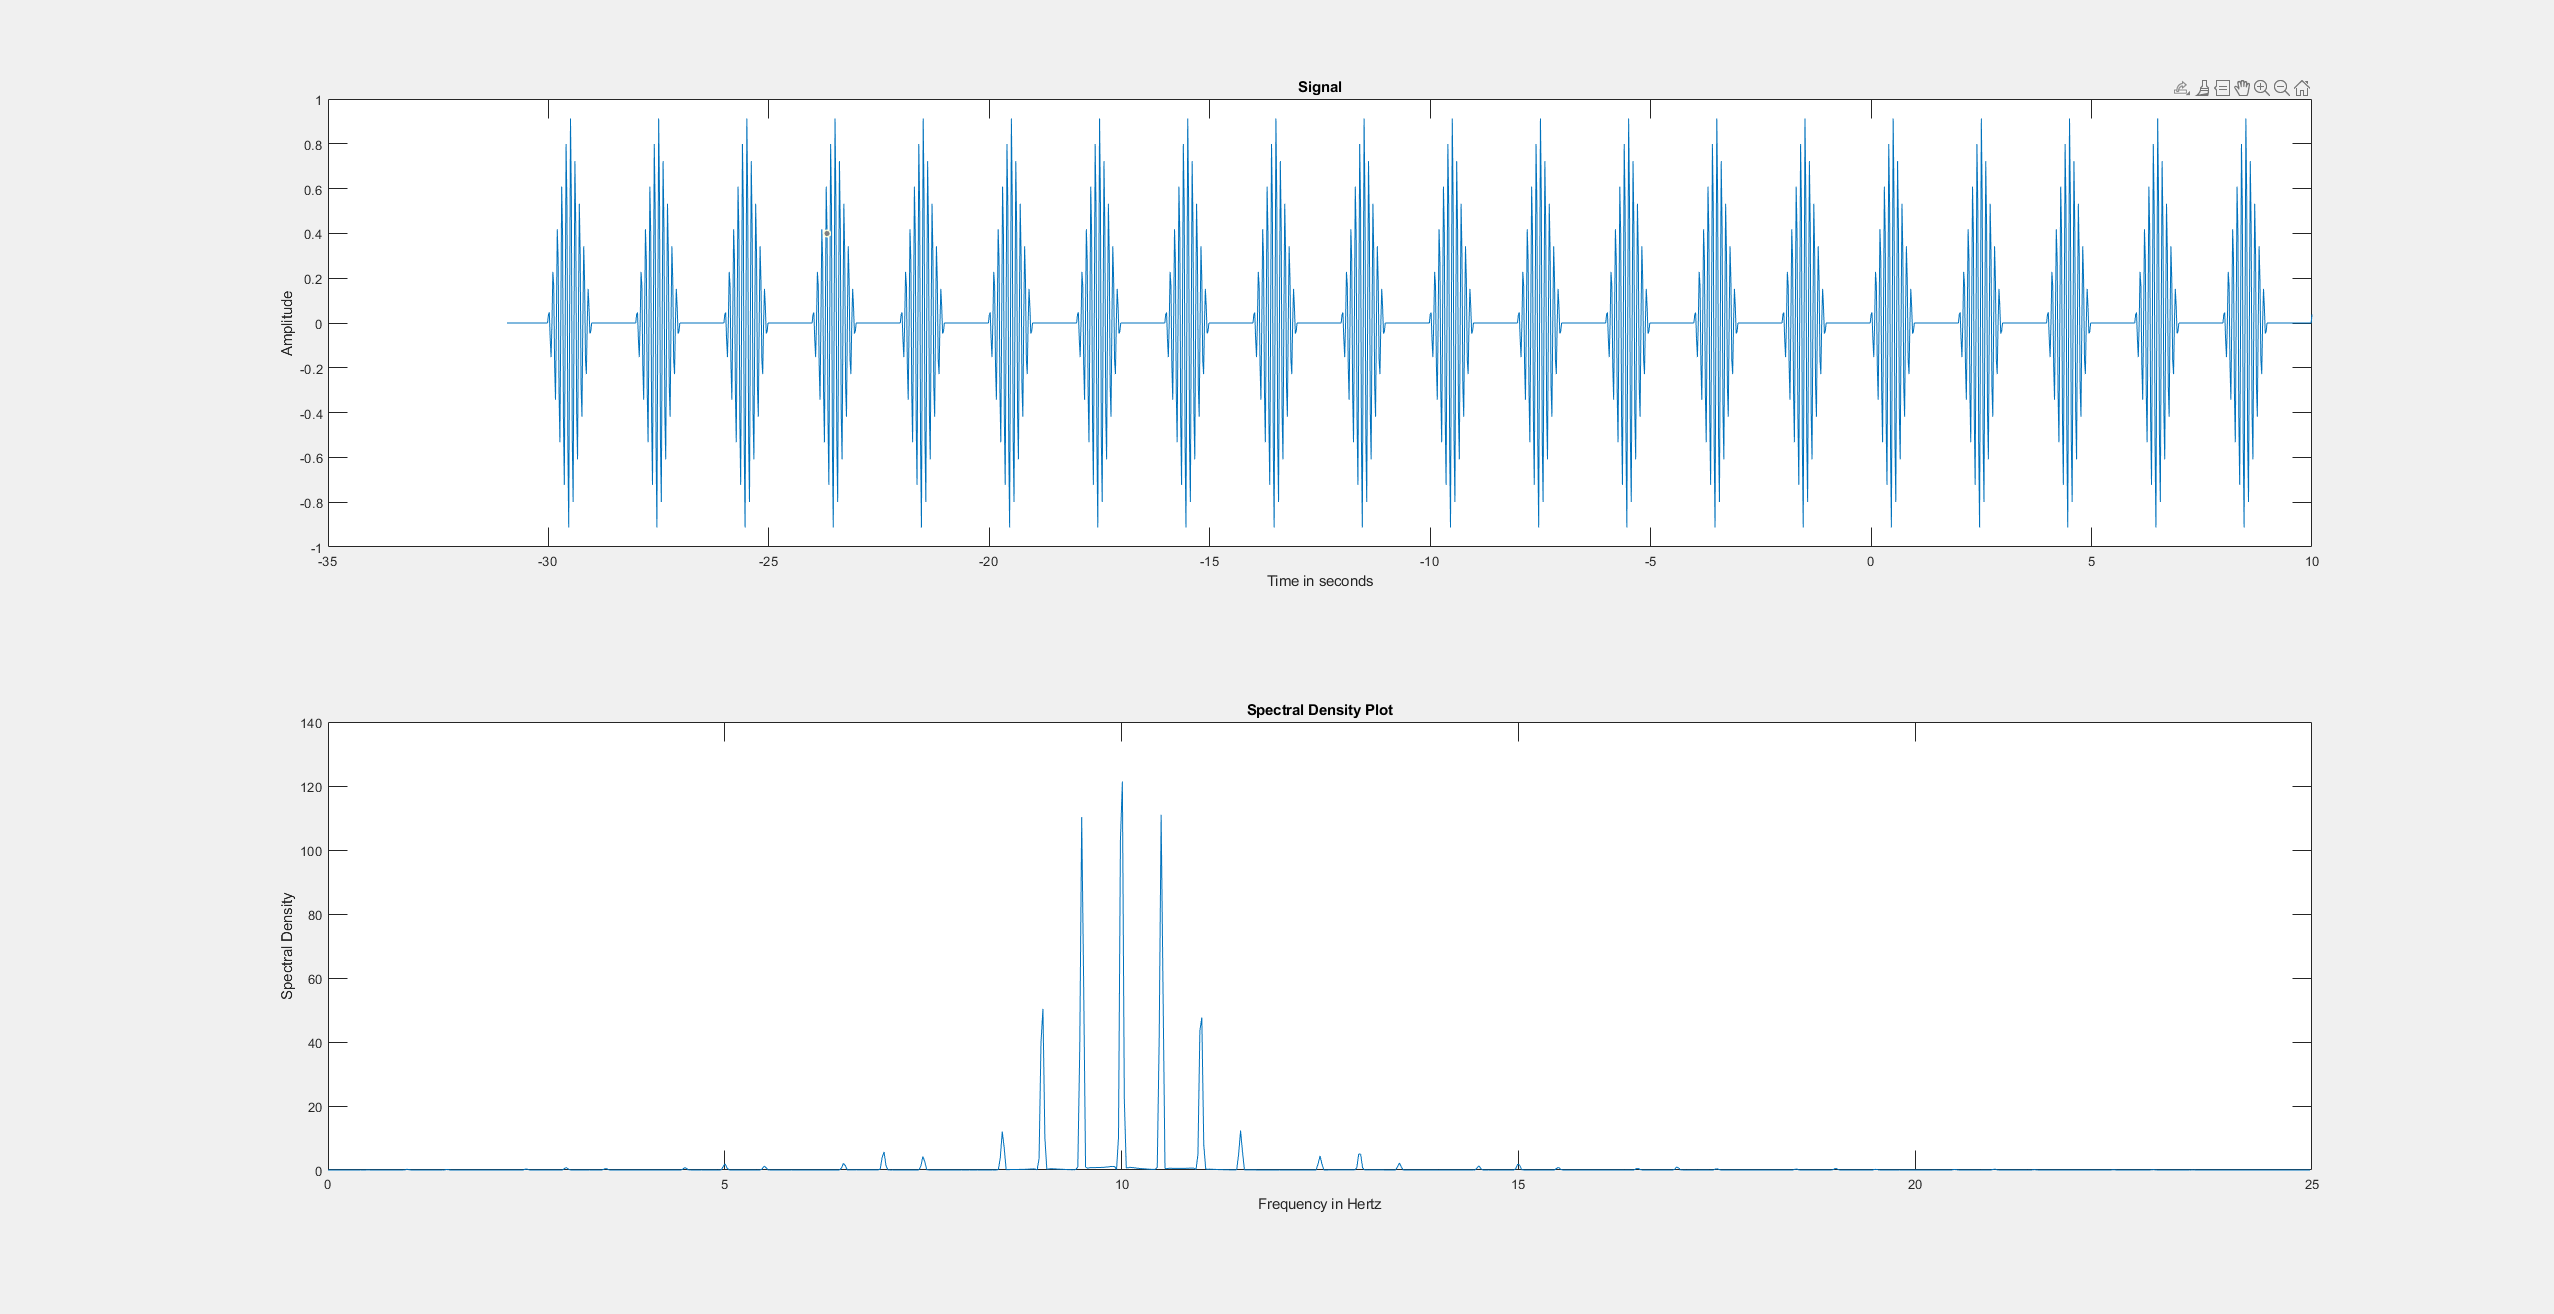
Modulating Frequency increased to 15 Hz:
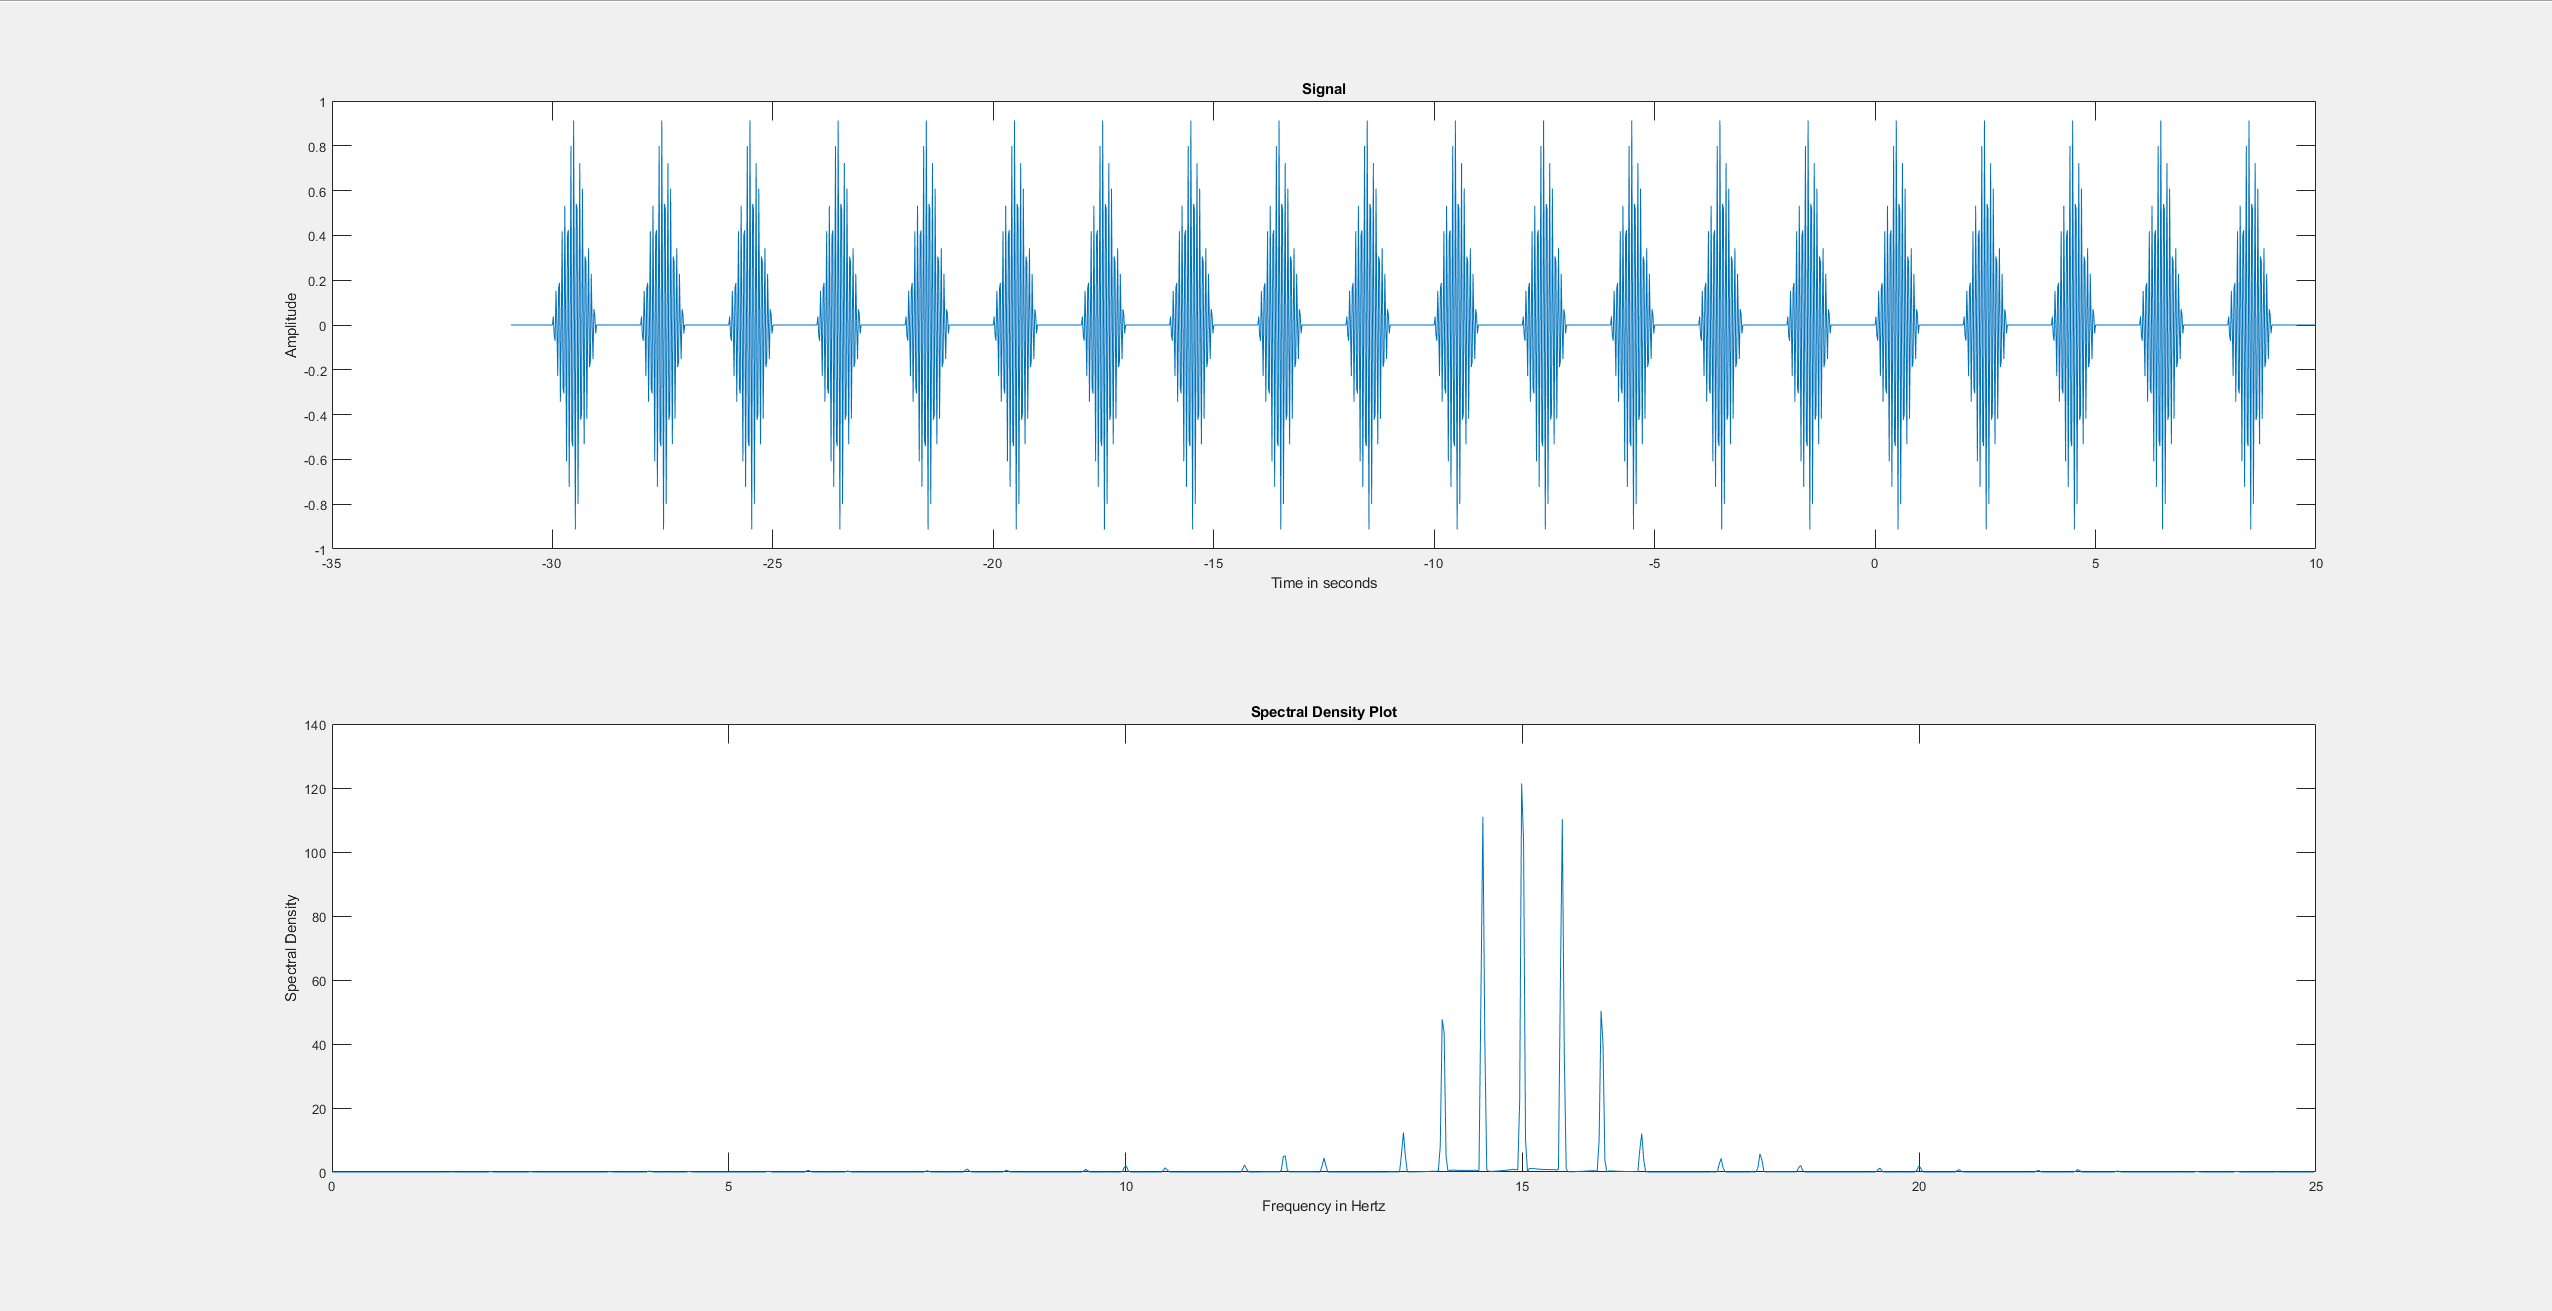
Period adjusted to 3 seconds:
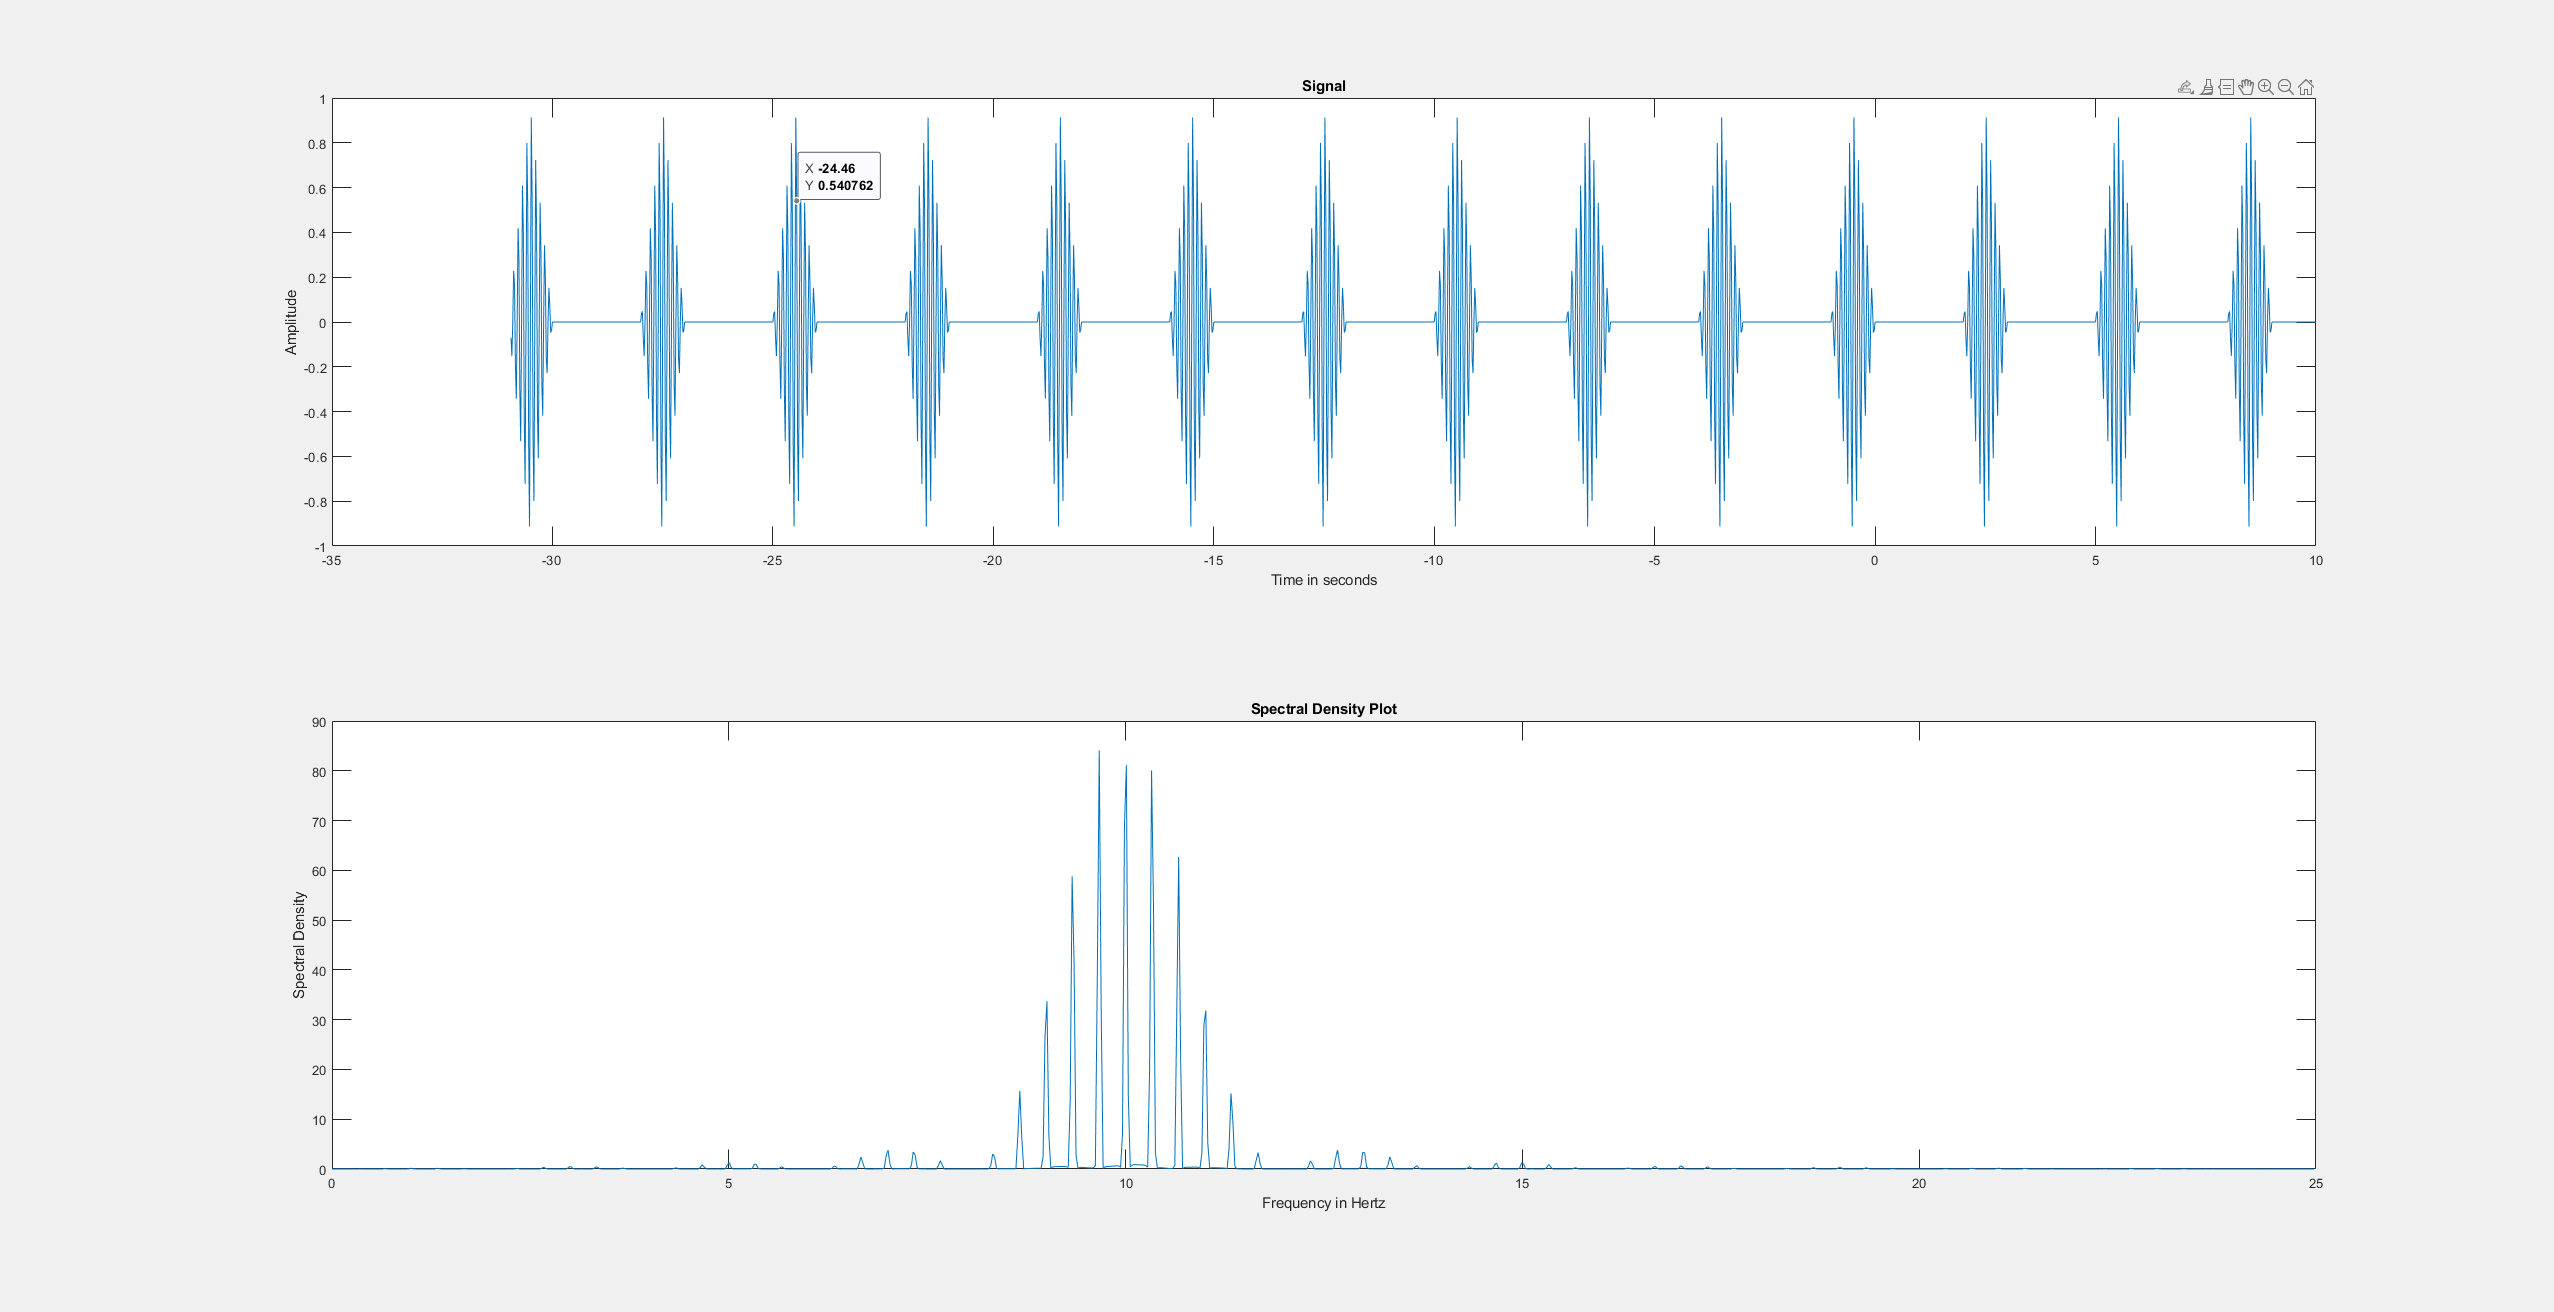
Period adjusted to 6 seconds:
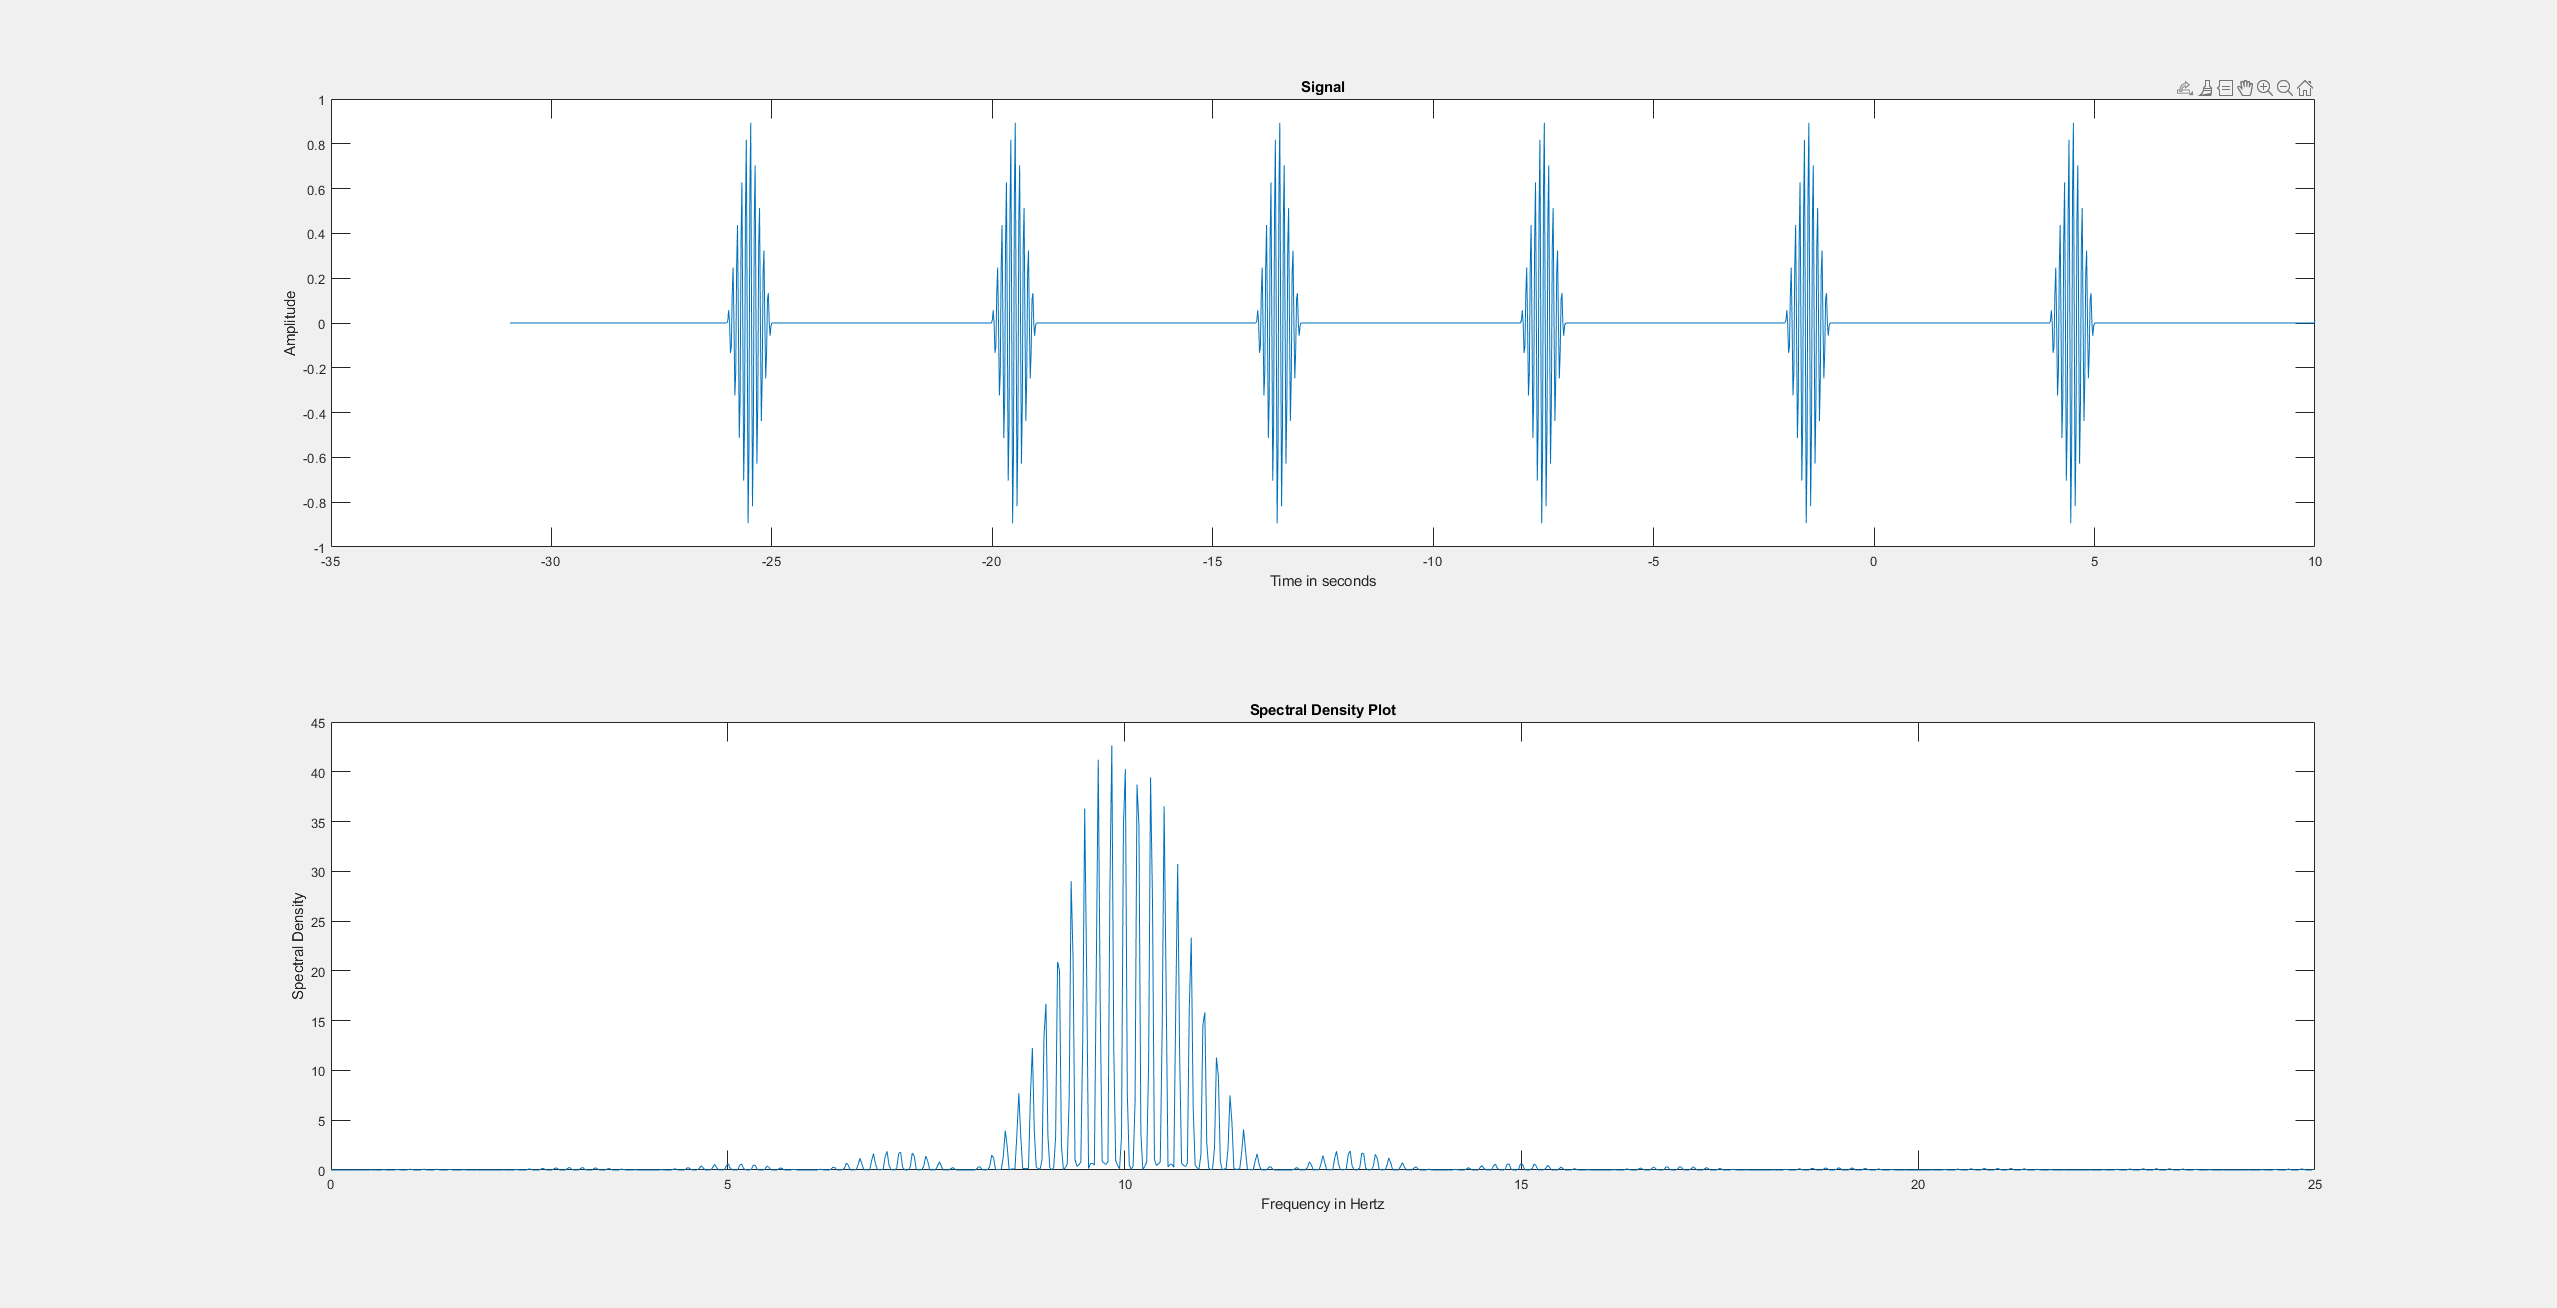



**2. What effect does changing the modulating frequency have on the spectral density?**

It shifted the spectral density curve from peaking at 10 Hz to 15 Hz (which is what the modulating frequency was changed to)

**3. Why does the spectrum have a comb structure and what is the spectral distance between impulses? Why?**

The spectrum has a comb structure because it consists of discrete frequency harmonics (like the sinusoids that composed the signal in the previous part). The spectral distance between each impulse is the gap in frequency of the different sinusoids. This gap is affected the perioid of the overall signal. 

**4. What would happen to the spectral density if the period of the triangle pulse were to
increase toward infinity? (in the limit)**  

The spectral density would get infinitely dense (completely filed in). 

<h3 style="color:red;"><left>Exercise 4.3</left></h3>

**1. Hand in the printout of the output of the Network Analyzer (magnitude and phase of the
frequency response, and the impulse response).**

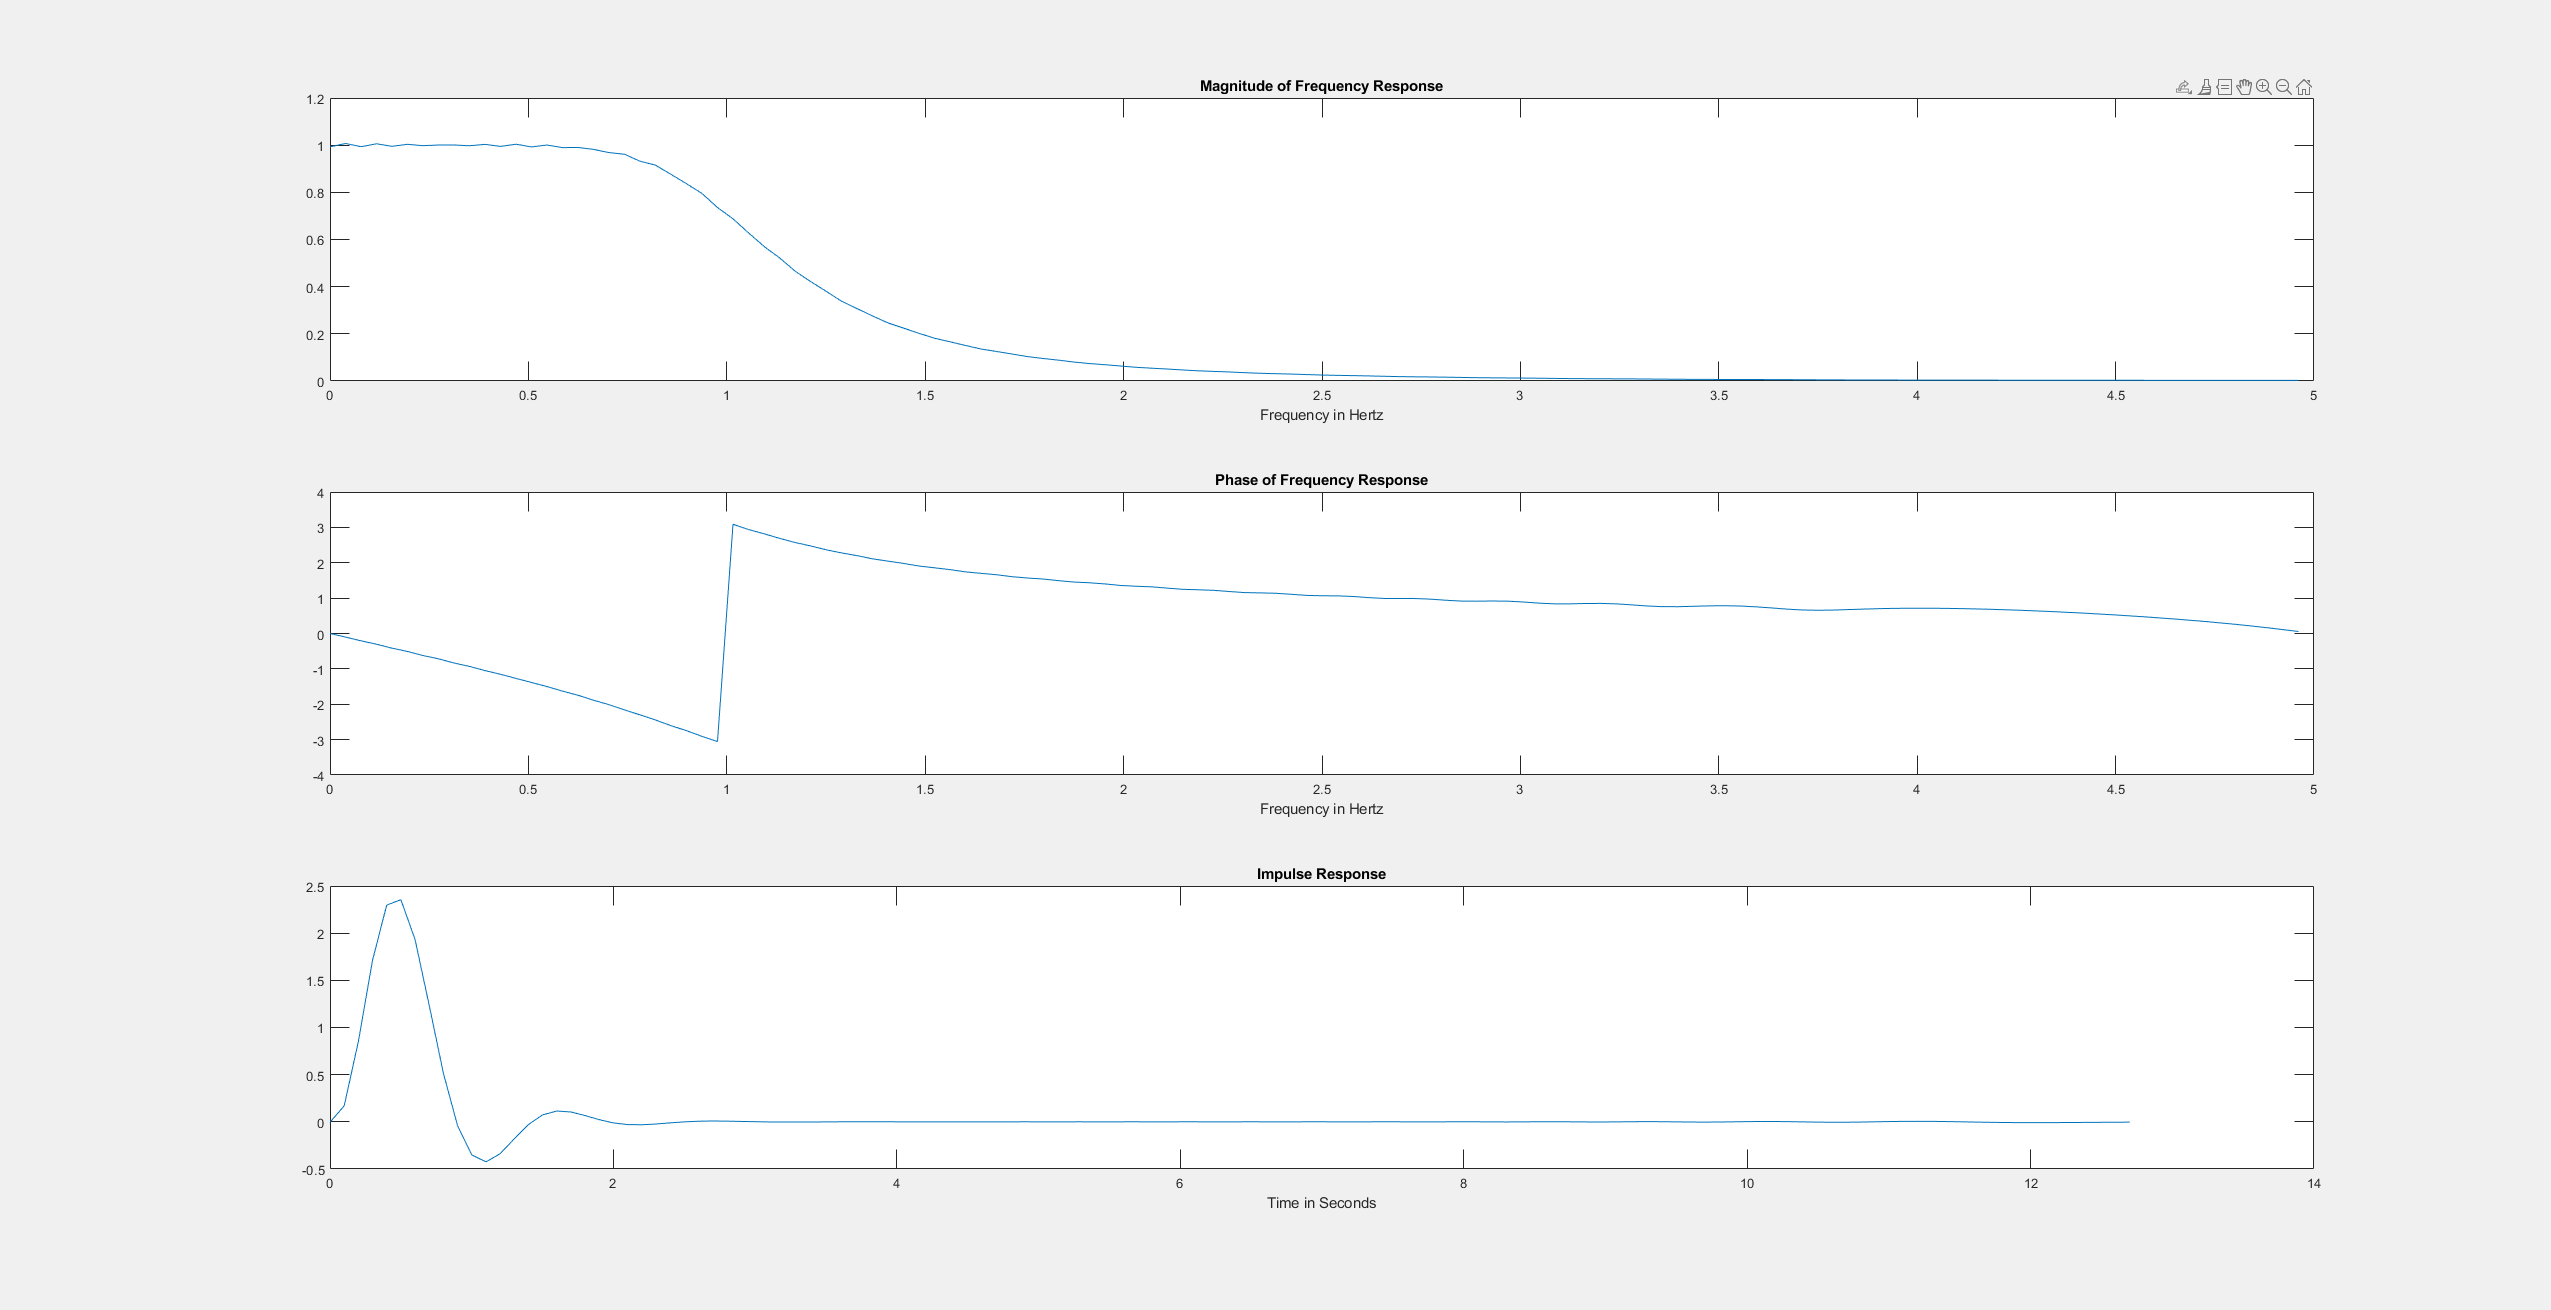


**2. Hand in the plot of the impulse response obtained using a unit step.**

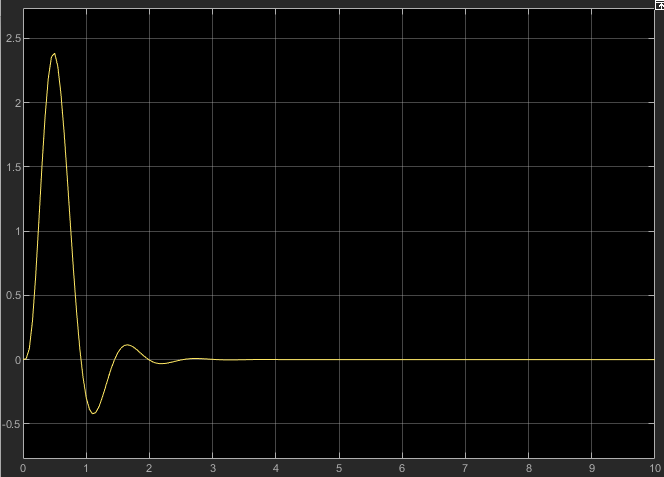


**3. What are the advantages and disadvantages of each method?**

Calculating the impulse response using the unit step and derivative method may be simpler, but calculating the derivative can be compute-intensive. Using a newtork analyzer may be more efficient although harder to implement. 

<h3 style="color:red;"><left>Exercise 5.1</left></h3>

**1. Complete the follwing function that computes the DTFT of a discrete-time signal.** 
```python
def DTFT(x,n0,w):
    """
    This function computes the DTFT of a discrete-time signal.
    
    Parameters
    ---
    x: the discrete-time signal
    n0: time index corresponding to the 1st element of the x vector
    w: frequencies
    
    Returns
    ---
    X: the computed DTFT
    """
    pass
```
**Note that if ```x``` is a vector of length $N$, then its DTFT is computed by**

\begin{equation}
    X(\omega)=\sum_{n=0}^{N-1}x[n]e^{-jw(n+n0)}
\end{equation}

**where $w$ is a vector that contains the frequencies from $-\pi$ to $\pi$.**

**Hint:** In Python, ```1j``` is defined as $\sqrt{-1}$. Use `np.exp(x)` to calculate $e^x$.

In [64]:
def DTFT(x, n0, w):
    N = len(x) #find length of signal array
    n = np.arange(N) + n0 #find n + n0 at every point
    X_w = np.zeros_like(w, dtype=complex) #Create a complex empty output array for signals of different frequencies
    for i, wi in enumerate(w):
        X_w[i] = np.sum(x * np.exp(-1j * wi * n))
    return X_w


**2. For the following signals** 

* $x[n]=\delta[n]$
* $x[n]=\delta[n-5]$
* $x[n]=(0.5)^nu[n]$

**use your DTFT function to compute $X(\omega)$, and plots its magnitude and phase.**

**Hint**: Use `np.power(a,b)` to calculate $a^b$. Use ```np.abs()``` and ```np.angle()``` to compute the magnitude and phase.

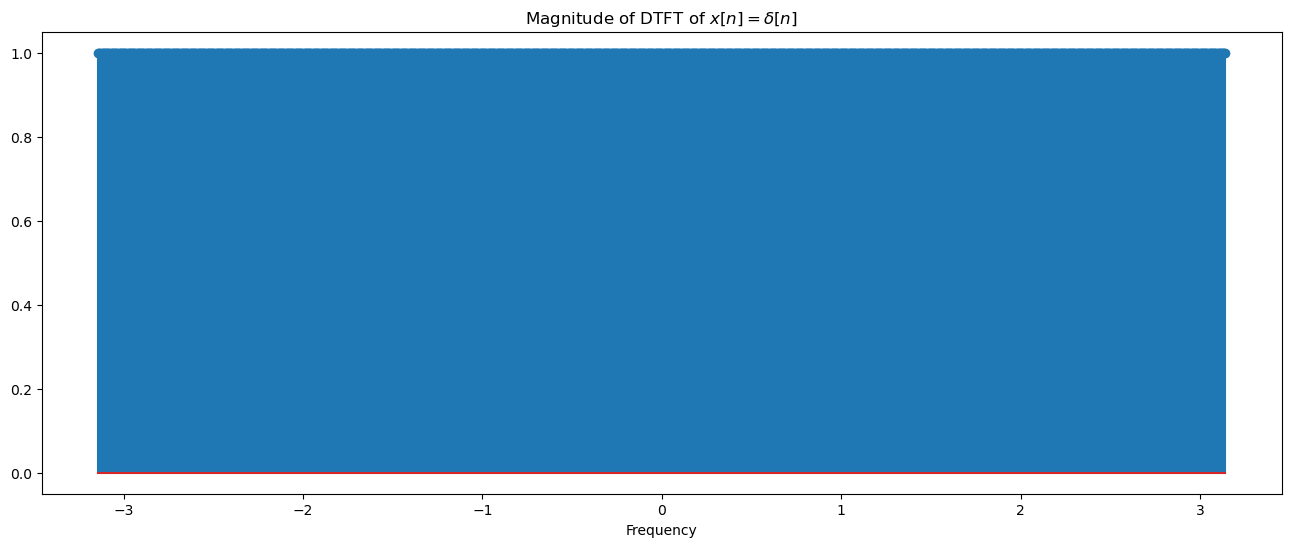

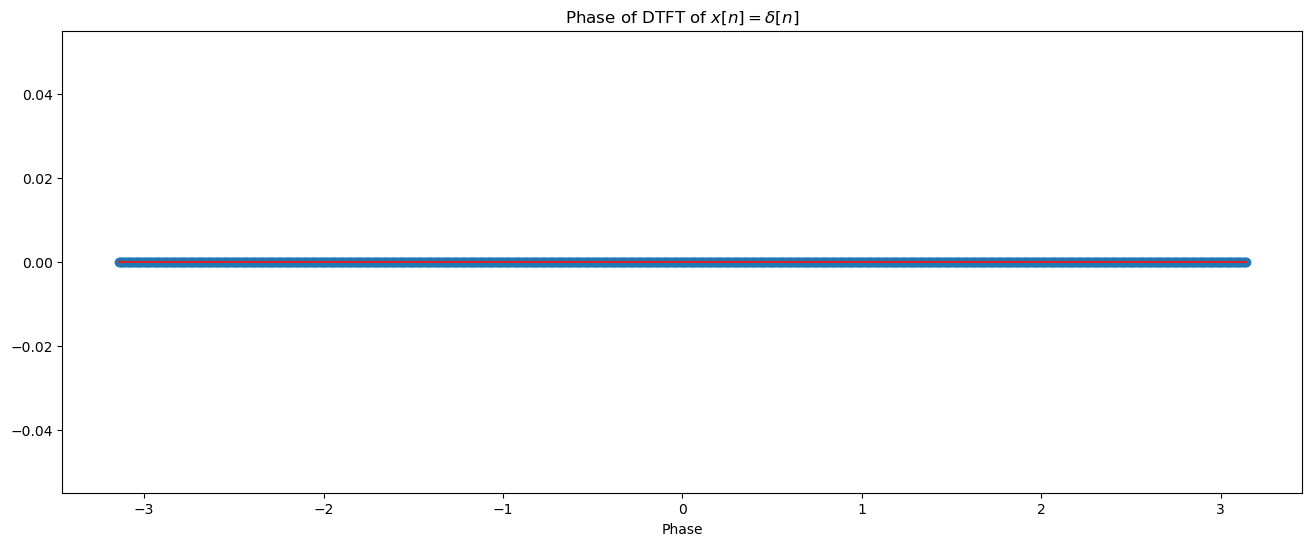

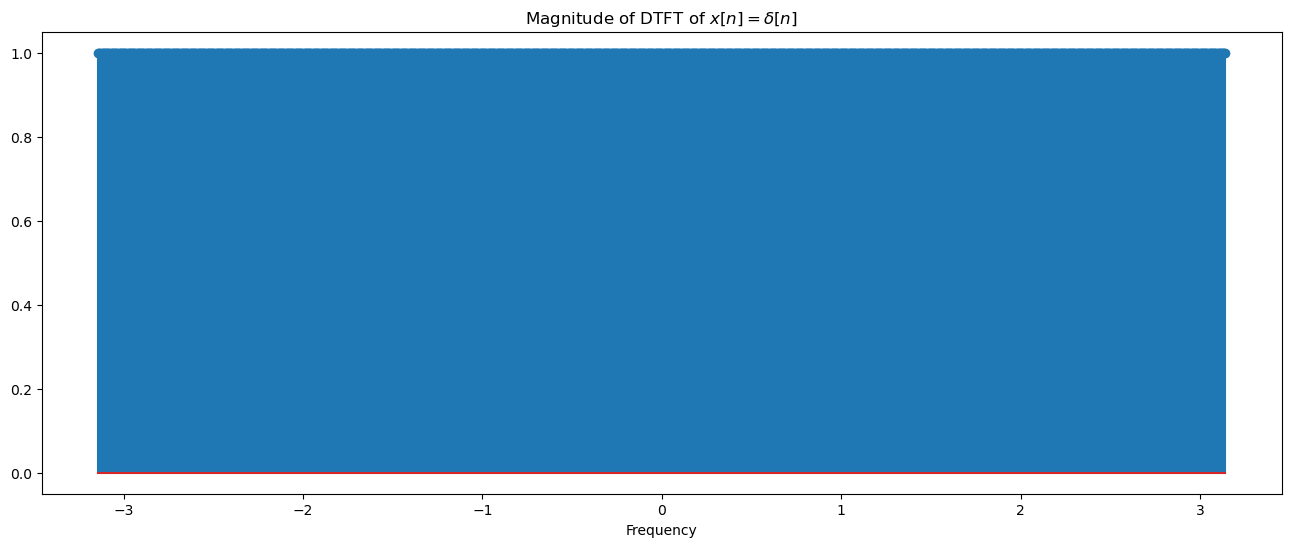

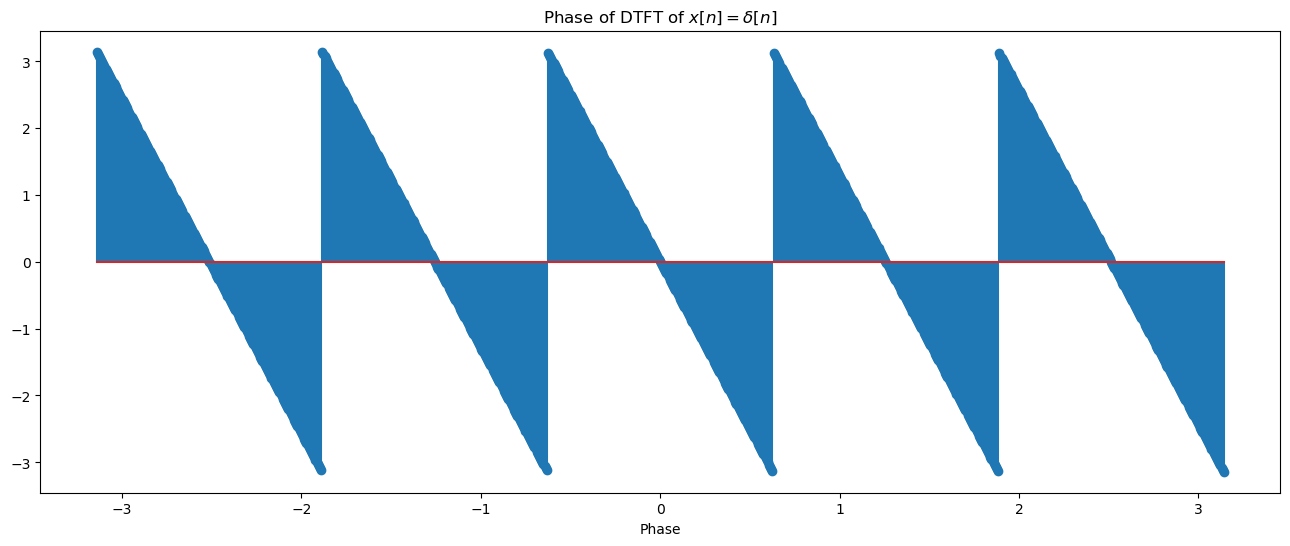

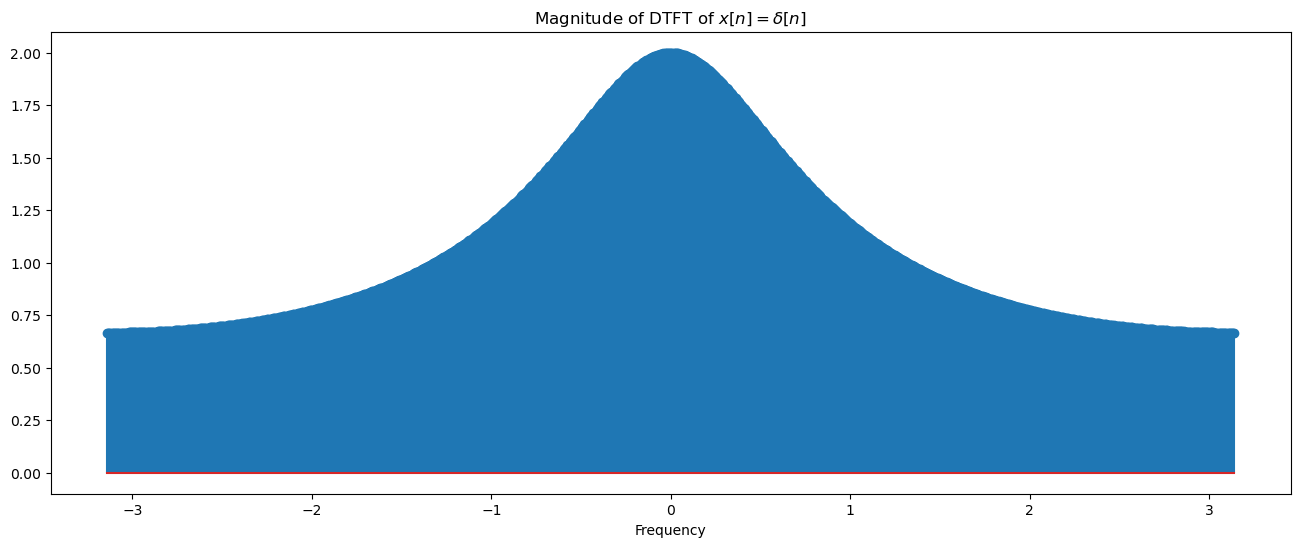

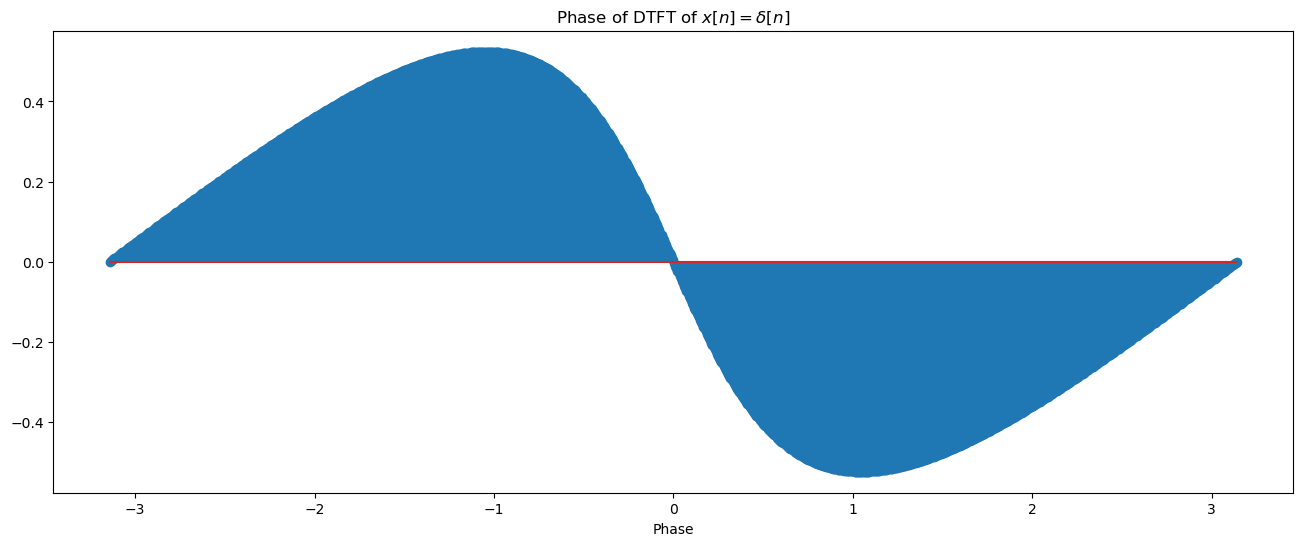

In [65]:
# write your code here

w = np.linspace(-np.pi, np.pi, 1000)

n1 = np.zeros(50)
n1[0] = 1 #make "unit impulse" array of 1 when n = 0, 0 all other times

n2 = np.zeros(50)
n2[5] = 1 #make "unit impulse" array of 1 when n = 5, 0 all other times

t3 = np.arange(0, 50, 1)
n3 = (t3 >= 0).astype(float) * np.power(0.5, t3)

plt.stem(w, np.abs(DTFT(n1, 0, w)))
plt.title(r"Magnitude of DTFT of $ x[n] = \delta[n]$")
plt.xlabel(r"Frequency")
plt.show()

plt.stem(w, np.angle(DTFT(n1, 0, w)))
plt.title(r"Phase of DTFT of $ x[n] = \delta[n]$")
plt.xlabel(r"Phase")
plt.show()

plt.stem(w, np.abs(DTFT(n2, 0, w)))
plt.title(r"Magnitude of DTFT of $ x[n] = \delta[n]$")
plt.xlabel(r"Frequency")
plt.show()

plt.stem(w, np.angle(DTFT(n2, 0, w)))
plt.title(r"Phase of DTFT of $ x[n] = \delta[n]$")
plt.xlabel(r"Phase")
plt.show()

plt.stem(w, np.abs(DTFT(n3, 0, w)))
plt.title(r"Magnitude of DTFT of $ x[n] = \delta[n]$")
plt.xlabel(r"Frequency")
plt.show()

plt.stem(w, np.angle(DTFT(n3, 0, w)))
plt.title(r"Phase of DTFT of $ x[n] = \delta[n]$")
plt.xlabel(r"Phase")
plt.show()


<h3 style="color:red;"><left>Exercise 5.2: Magnitude and Phase of the Frequency Response of a Discrete-Time Systems</left></h3>

Consider the discrete-time system described by the following difference equation:

\begin{equation}y[n]=0.9y[n-1]+0.3x[n]+0.24x[n-1]\end{equation}

Assume that the system is **causal**.

**1. Draw a system diagram.**

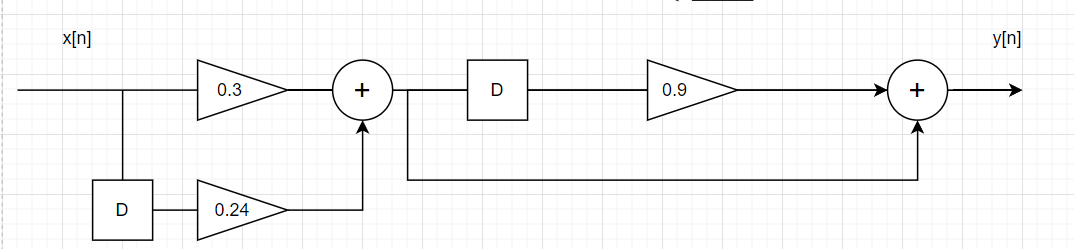

**2. Obtain the impulse response of the system by replacing $x[n]$ with $\delta[n]$ in the above equation. (Use causality to set up the initial conditions.)**

\begin{equation}y[n]=0.9y[n-1]+0.3\delta[n]+0.24\delta[n-1]\end{equation}

**3. Use your answer in Q2 to obtain the frequency response of the system.**

You can replace y[n] and dirac[n] with 1 in order to get the frequency reponse. y[n-1] and x[n-1] become e^-jw. Then, H(w) = Y(w)/X(w). This allows you to get:

\begin{equation}H(\omega) = (0.3 + 0.24e^{(-jω)}) / (1 - 0.9e^{(-jω)})\end{equation}

**4. Find the frequency response of the system using another method. Specifically, take the DTFT of the left-hand-side and right-hand-side of the difference equation, and then use linearity and the time-shifting property of the DTFT along with the fact that $H(\omega)=\frac{Y(\omega)}{X(\omega)}$**

Using that method, you receive the same result of
\begin{equation}H(\omega) = (0.3 + 0.24e^{(-jω)}) / (1 - 0.9e^{(-jω)})\end{equation}

**5. Write Python code to compute and plot the magnitude and phase responses, $|H(\omega)|$ and $\angle H(\omega)$, for $-\pi<\omega<\pi$.**

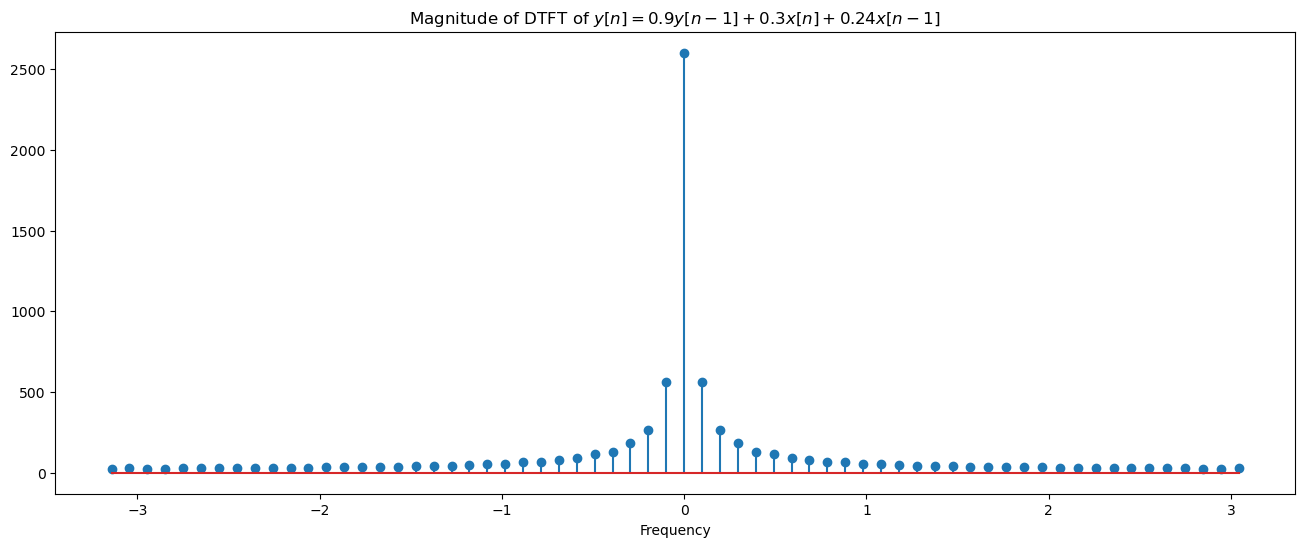

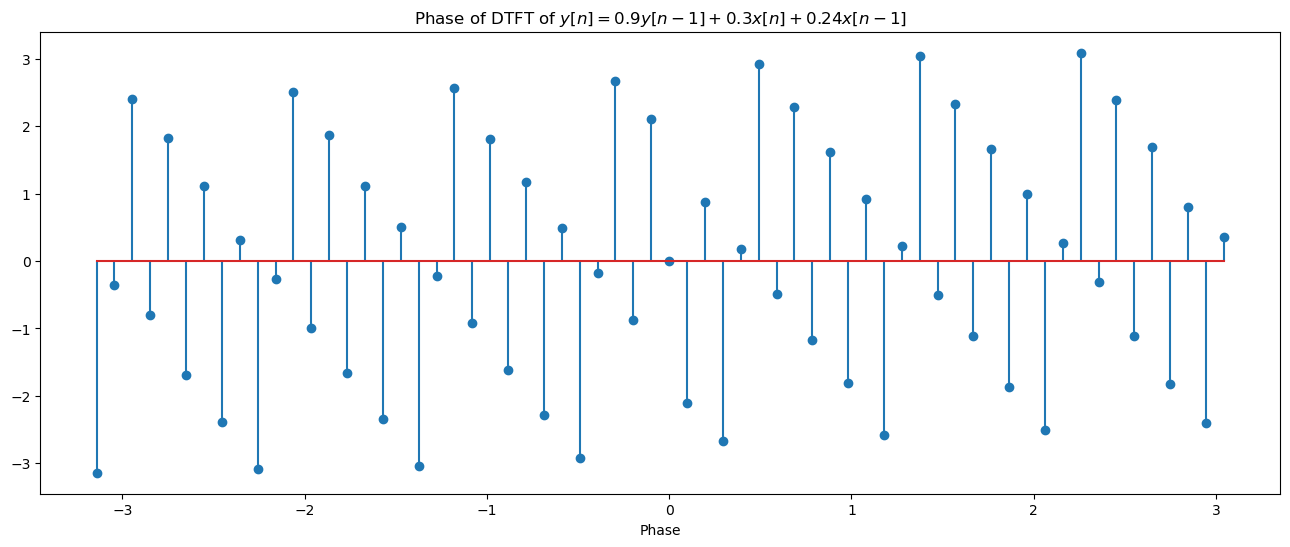

In [66]:
# write your code here
#function for signal
def S1(x):
    y = np.zeros_like(x)
    y[0] = x[0]
    y[1:] = 0.9 * y[:-1] + 0.3 * x[1:] + 0.24 * x[:-1]
    return y
t1 = np.arange(0, 100, 1)
x1 = S1(t1)
w = np.arange(-np.pi, np.pi, np.pi/32)

plt.stem(w, np.abs(DTFT(x1, 0, w)))
plt.title(r"Magnitude of DTFT of $ y[n] = 0.9y[n-1] + 0.3x[n] + 0.24x[n-1]$")
plt.xlabel(r"Frequency")
plt.show()

plt.stem(w, np.angle(DTFT(x1, 0, w)))
plt.title(r"Phase of DTFT of $ y[n] = 0.9y[n-1] + 0.3x[n] + 0.24x[n-1]$")
plt.xlabel(r"Phase")
plt.show()


<h3 style="color:red;"><left>Exercise 5.3</left></h3>

**1. Insert the printout of your completed block diagram.**

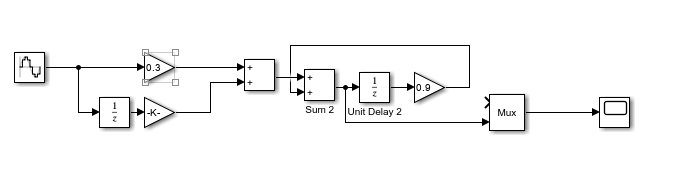

**2. Enter both the amplitude measurements you made and their theoretical values.**

I must have made a mistake somewhere. The graph of the magnitude does not align with what I see in the simulation. Below is the matlab simulation for pi/4
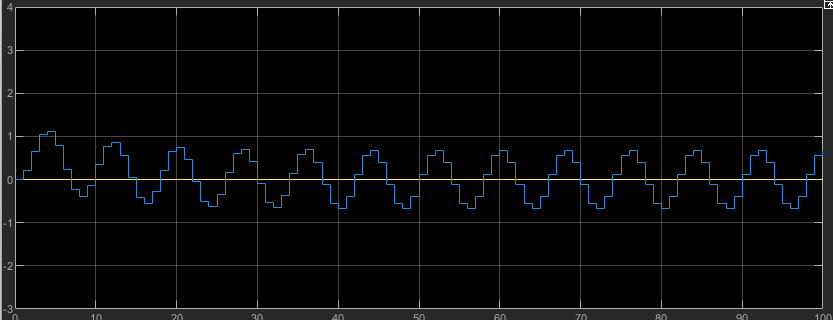

| $\omega$ | Measurements | Theoretical Values |
|:--------:|:------------:|:------------------:|
| $\pi/16$ |      3        |         250           |
|  $\pi/8$ |      2        |            62.5        |
|  $\pi/4$ |      1        |           31.25         |

**3. Plot the impulse response, and the magnitude and phase of the frequency response by using your DTFT function.**

In [67]:
# write your code here
